In [1]:
# INPUT: experiment name
study_name = 'homing_cmpt'
var_dict = {'cmpt_type': ['ss'], 'dem_mh_share': [0, 0.5, 1], 'sup_mh_share': [0, 0.5, 1]}  # assumes full enumeration
ref_value = [0, 0]

In [2]:
import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
path = os.getcwd()
res_path = path

In [3]:
# Determine scenarios - enumerating based on input
keys, values_lists = zip(*var_dict.items())
scenarios = list(itertools.product(*values_lists))
scenario_names = ['-'.join(f"{key}-{value}" for key, value in zip(keys, scenario)) for scenario in scenarios]
scenario_names = [s.replace('cmpt_type-','') for s in scenario_names]  # drop 'cmpt_type' from scn name

In [4]:
def open_pickle(scn_dict, aggr_scn_path, pkl_name):
    with open(os.path.join(aggr_scn_path, pkl_name), 'rb') as f:
        df = pickle.load(f)
        # print(df)
        for key, value in scn_dict.items():
            df[key] = value
        index_list = [key for key in scn_dict] + ['day']
        df = df.reset_index().set_index(index_list)
    return df

In [5]:
# Loop over scenarios, creating list of df's containing the data, and converting to single df
aggr_dem_list = []
aggr_sup_list = []
# mode_no_rs_list = []
mode_df = pd.DataFrame()
for scn_name in scenario_names:
    # Determine scenario values and save them to dict
    scn_name_split = scn_name.split('-')
    scn_dict = {}
    for i in range(1, len(scn_name_split), 2):
        variable_name = scn_name_split[i]
        variable_value = scn_name_split[i + 1]
        scn_dict[variable_name] = variable_value
    scn_dict['cmpt_type'] = scn_name_split[0]
    # List all folders and find those corresponding to the specific scenario
    aggr_scn_path = os.path.join(res_path, 'aggr_repl', scn_name) if (float(scn_name_split[2]) != ref_value[0] or float(scn_name_split[4]) != ref_value[1]) else os.path.join(res_path, 'aggr_repl', scn_name.split("-")[0])
    all_items = os.listdir(aggr_scn_path)
    aggr_dem = open_pickle(scn_dict, aggr_scn_path, 'aggr_dem.pkl')
    aggr_sup = open_pickle(scn_dict, aggr_scn_path, 'aggr_sup.pkl')

    with open(os.path.join(aggr_scn_path, 'mode_no_rs.pkl'), 'rb') as f:
        mode_series = pickle.load(f)
        for key, value in scn_dict.items():
            mode_series[key] = value
        mode_df = mode_df.append(mode_series, ignore_index=True)
    aggr_dem_list = aggr_dem_list + [aggr_dem]
    aggr_sup_list = aggr_sup_list + [aggr_sup]
    # mode_no_rs_list = mode_no_rs_list + [df]
aggr_dem = pd.concat(aggr_dem_list)
aggr_sup = pd.concat(aggr_sup_list)
# mode_no_rs = pd.concat(mode_no_rs_list)

In [6]:
# Add scenario label
non_day_level = [level for level in aggr_dem.index.names if level != 'day'] # Find the scenario indices
if len(non_day_level) == 1:
    aggr_dem['label'] = aggr_dem.index.get_level_values(non_day_level[0])
    aggr_sup['label'] = aggr_sup.index.get_level_values(non_day_level[0])
else:
    aggr_dem['label'] = pd.Series(aggr_dem.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row), axis=1).values, index = aggr_dem.index)
    aggr_sup['label'] = pd.Series(aggr_sup.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row), axis=1).values, index = aggr_sup.index)
# mode_df = mode_df.rename(columns={"cmpt_type":"label"}).set_index('label')

In [7]:
# aggr_sup.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row))
# aggr_sup.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row), axis=1)
aggr_sup
# aggr_sup.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row), axis=1)
# pd.Series(aggr_sup.index.to_frame(index=False)[non_day_level].astype(str).apply(lambda row: '_'.join(row), axis=1).values, index=aggr_sup.index)

pickup_dist   repos_dist  \
dem_mh_share sup_mh_share cmpt_type day                             
0            0            ss        0    8297.954798  7911.932069   
                                    1    8353.245855  8051.966045   
                                    2    8320.383161  8209.255064   
                                    3    8299.824335  8101.528916   
                                    4    8190.236021  8221.546429   
...                                              ...          ...   
1            1            ss        200  7910.154299  7892.361871   
                                    201  8133.116950  7801.826641   
                                    202  8330.283855  8497.720845   
                                    203  7960.202743  8106.043864   
                                    204  8418.015970  7958.200624   

                                             km_occ_1      km_occ_0  informed  \
dem_mh_share sup_mh_share cmpt_type day                                         
0            0            ss        0    53908.214400  16209.886867    2500.0   
                                    1    54185.164000  16405.211900    2500.0   
                                    2    54002.671857  16529.638225    2500.0   
                                    3    53970.233018  16401.353251    2500.0   
                                    4    54161.009599  16411.782450    2500.0   
...                                               ...           ...       ...   
1            1            ss        200  56106.212784  15802.516170    2500.0   
                                    201  56840.030796  15934.943591    2500.0   
                                    202  57002.840608  16828.004700    2500.0   
                                    203  56810.416967  16066.246607    2500.0   
                                    204  57153.309615  16376.216594    2500.0   

                                         registered_0  registered_1  ptcp_0  \
dem_mh_share sup_mh_share cmpt_type day                                       
0            0            ss        0           238.8         350.0   192.0   
                                    1           239.0         352.2   194.0   
                                    2           238.6         352.8   193.4   
                                    3           238.2         354.4   192.4   
                                    4           237.4         355.8   193.0   
...                                               ...           ...     ...   
1            1            ss        200         607.0         607.0   488.0   
                                    201         605.0         605.0   490.0   
                                    202         606.0         606.0   490.0   
                                    203         606.0         606.0   489.0   
                                    204         605.0         605.0   488.0   

                                         ptcp_1     exp_inc  ...  \
dem_mh_share sup_mh_share cmpt_type day                      ...   
0            0            ss        0     280.2  113.130044  ...   
                                    1     279.4  113.332017  ...   
                                    2     281.0  112.722764  ...   
                                    3     281.2  112.833417  ...   
                                    4     281.8  112.940693  ...   
...                                         ...         ...  ...   
1            1            ss        200   488.0  114.691332  ...   
                                    201   490.0  115.729418  ...   
                                    202   490.0  115.600980  ...   
                                    203   489.0  115.891682  ...   
                                    204   488.0  116.734457  ...   

                                         perc_inc_sh_largest  \
dem_mh_share sup_mh_share cmpt_type day                        
0            0            ss        0           

In [8]:
(aggr_dem.gets_offer_0/ aggr_dem.requests_0).head(270)
aggr_dem.corr_xp_wait_1.head(272)
# aggr_dem.xp_wait_0.head(272)
aggr_dem.xs(('0','0','ss')).tail(50).corr_xp_wait_1

day
100    775.174319
101    521.836438
102    520.875320
103    520.748825
104    520.415447
105    776.104002
106    776.014457
107    777.221584
108    522.029464
109     97.188077
110     92.883503
111     94.177254
112     95.080221
113    520.984935
114    521.010568
115     96.035533
116    778.063710
117    774.581967
118    776.185755
119    519.557456
120    520.594301
121    521.398889
122    522.423782
123    776.598806
124    776.895195
125    776.308675
126    521.797238
127     92.073559
128     93.956699
129    520.518336
130    776.103833
131    776.622841
132    521.088740
133    521.373121
134    777.467534
135     94.871680
136     94.867838
137    775.700876
138    776.169671
139    776.657148
140     93.534389
141    519.472065
142     93.379276
143     91.984597
144    520.374572
145    521.579747
146     93.453832
147     96.861650
148     94.888124
149    520.702841
Name: corr_xp_wait_1, dtype: float64

In [9]:
# Create df with market (system) level indicators
aggr_dem_reset = aggr_dem.reset_index()
aggr_sup_reset = aggr_sup.reset_index()
market_df = aggr_dem_reset.copy()[['day','label']]
market_df['tot_regist_dem'] = aggr_dem_reset.registered_mh + aggr_dem_reset.registered_sh_0 + aggr_dem_reset.registered_sh_1.fillna(0)
market_df['market_share'] = (aggr_dem_reset.accepts_offer_0 + aggr_dem_reset.accepts_offer_1.fillna(0)) / 100000
# market_df['exp_wait'] = aggr_dem_reset.corr_xp_wait
# market_df['exp_ivt'] = aggr_dem_reset.xp_ivt
market_df['tot_regist_sup'] = aggr_sup_reset.registered_mh + aggr_sup_reset.registered_sh_0 + aggr_sup_reset.registered_sh_1.fillna(0)
market_df['tot_ptcp'] = aggr_sup_reset.ptcp_mh + aggr_sup_reset.ptcp_sh_0 + aggr_sup_reset.ptcp_sh_1.fillna(0)
market_df['exp_inc'] = aggr_sup_reset.exp_inc
# market_df['perc_inc_reg_mh'] = aggr_sup_reset.perc_inc_reg_mh
# market_df['perc_inc_notreg_mh'] = aggr_sup_reset.perc_inc_notreg_mh
market_df['rel_pickup_dist'] = aggr_sup_reset.pickup_dist / market_df.market_share / 100000
market_df['rel_repos_dist'] = aggr_sup_reset.repos_dist / market_df.market_share / 100000
if 'km_occ_2' in aggr_sup_reset.columns:
    km_occ_2 = aggr_sup_reset.km_occ_2.fillna(0)
else:
    km_occ_2 = 0
if 'km_occ_3' in aggr_sup_reset.columns:
    km_occ_3 = aggr_sup_reset.km_occ_3.fillna(0)
else:
    km_occ_3 = 0
if 'km_occ_4' in aggr_sup_reset.columns:
    km_occ_4 = aggr_sup_reset.km_occ_4.fillna(0)
else:
    km_occ_4 = 0
if 'km_occ_5' in aggr_sup_reset.columns:
    km_occ_5 = aggr_sup_reset.km_occ_5.fillna(0)
else:
    km_occ_5 = 0
if 'km_occ_6' in aggr_sup_reset.columns:
    km_occ_6 = aggr_sup_reset.km_occ_6.fillna(0)
else:
    km_occ_6 = 0
market_df['rel_serving_dist'] = (aggr_sup_reset.km_occ_1.fillna(0) + km_occ_2 + km_occ_3 + km_occ_4 + km_occ_5 + km_occ_6) / market_df.market_share / 100000
market_df['driver_per_req'] = market_df.tot_ptcp / market_df.market_share / 100000
market_df['service_rate'] = (aggr_dem_reset.accepts_offer_0 + aggr_dem_reset.accepts_offer_1.fillna(0)) / (aggr_dem_reset.requests_mh + aggr_dem_reset.requests_sh_0 + aggr_dem_reset.requests_sh_1.fillna(0))
market_df['service_rate_0'] = aggr_dem_reset.gets_offer_0 / aggr_dem_reset.requests_0
market_df['service_rate_1'] = aggr_dem_reset.gets_offer_1 / aggr_dem_reset.requests_1

In [10]:
# # Set indicators to be plotted (selected from market df)
# plot_indicators = market_df.columns.drop(['label', 'day'])

# # Calculate the number of subplots based on the number of columns
# num_subplots = len(plot_indicators)

# # Create subplots within a single figure
# fig, axs = plt.subplots(nrows=num_subplots, figsize=(10, 6*num_subplots))

# # Iterate over columns and create subplots
# for idx, col in enumerate(plot_indicators):
#     ax = axs[idx]
    
#     # Iterate over unique labels and plot the data for each label
#     for label in unique_labels:
#         label_data = market_df[market_df['label'] == label]
#         ax.plot(label_data['day'], label_data[col], label=label)
    
#     ax.set_xlabel('Day')
#     ax.set_ylabel(col)
#     ax.set_title(f'Column: {col}')
#     ax.legend()

# plt.tight_layout()
# plt.savefig('Select-indicators.png', facecolor='w')
# # plt.show()

In [11]:
conv_steady_days = 10
moving_average_days = 75
eql_dem = aggr_dem.groupby(['label']).tail(conv_steady_days + moving_average_days).groupby(['label']).mean()
eql_sup = aggr_sup.groupby(['label']).tail(conv_steady_days + moving_average_days).groupby(['label']).mean()

In [12]:
# # Set indicators to be plotted (selected from market df)
# plot_indicators = eql_dem.columns

# # Calculate the number of subplots based on the number of columns
# num_subplots = len(plot_indicators)

# # Create subplots within a single figure
# fig, axs = plt.subplots(nrows=num_subplots, figsize=(10, 6*num_subplots))

# # Iterate over columns and create subplots
# for idx, col in enumerate(plot_indicators):
#     ax = axs[idx]
    
#     # # Iterate over unique labels and plot the data for each label
#     # for label in unique_labels:
#     #     label_data = eql_dem[eql_dem.index == label]
#     ax.bar(height=eql_dem[col], x=eql_dem.index.values)
    
#     ax.set_xlabel('Day')
#     ax.set_ylabel(col)
#     ax.set_title(f'Column: {col}')
#     ax.legend()

# plt.tight_layout()
# plt.savefig('Eql-select-indicators.png', facecolor='w')

In [13]:
# aggr_sup.groupby(['label']).tail(conv_steady_days + moving_average_days).reset_index()

In [14]:
# # plot data in stack manner of bar type
# eql_dem['rs'] = eql_dem.accepts_offer_0 + eql_dem.accepts_offer_1.fillna(0)

# # Create the stacked bar chart
# ax = (eql_dem[['rs','bike','car','pt']] / 100000 * 100).reset_index().plot(x='label', kind='bar', stacked=True,
#         title='Modal share under different ridesourcing service types')

# # # Label bars with their values
# # for container in ax.containers:
# #     ax.bar_label(container, label_type='center', fontsize=10, padding=3, labels=[f'{h:.2f}' for h in container.get_heights()])

# # Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.1f%%')
# # Show the plot
# plt.ylabel('Modal share (%)')
# plt.legend(bbox_to_anchor=(1, 0.5))
# plt.show()

In [15]:
eql_dem['former_bike'] = mode_df.no_rs_bike - eql_dem.bike
eql_dem['former_car'] = mode_df.no_rs_car - eql_dem.car
eql_dem['former_pt'] = mode_df.no_rs_pt - eql_dem.pt


In [16]:
# # Create the stacked bar chart
# ax = (eql_dem[['former_bike','former_car','former_pt']]).div((eql_dem['requests_0'] + eql_dem['requests_1'].fillna(0)) / 100, axis=0).reset_index().plot(x='label', kind='bar', stacked=True,
#         title='Modal share under different ridesourcing service types')

# # # Label bars with their values
# # for container in ax.containers:
# #     ax.bar_label(container, label_type='center', fontsize=10, padding=3, labels=[f'{h:.2f}' for h in container.get_heights()])

# # Label bars with their values
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.1f%%')
# # Show the plot
# plt.ylabel('Modal share (%)')
# plt.legend(bbox_to_anchor=(1, 0.5))
# plt.show()

# # waarom 50 procent bij requests_sh_0, requests_sh_1 en requests_mh, gaat iets fout? heeft iets met singlehoming en multihoming te maken? bars zijn ook niet helemaal gelijk?
# # dit plaatje met accepts_offer kan meer zijn dan 1 omdat er ook requests worden afggewezen?
# # Note: requests is niet goed als er multi-homers zijn. Bars zijn ook niet allemaal gelijk?

In [17]:
eql_dem

,informed,requests_0,requests_1,gets_offer_0,gets_offer_1,accepts_offer_0,accepts_offer_1,registered_0,registered_1,car,...,perc_detour_sh_0,perc_detour_sh_1,perc_km_fare_mh,perc_km_fare_sh_0,perc_km_fare_sh_1,eff_pax_dist_0,eff_pax_dist_1,former_bike,former_car,former_pt
label,,,,,,,,,,,,,,,,,,,,,
0.5_0.5_ss,30953.000000,8699.058824,5642.529412,8697.270588,5638.952941,7025.588235,2465.905882,27935.152941,18471.047059,7121.588235,...,3.477211e-07,-5.076800e-07,1.500000,1.5,1.499999,4.159995e+07,1.419567e+07,NaN,NaN,NaN
0.5_0_ss,30947.029412,8279.811765,5884.141176,8275.323529,5877.429412,6653.100000,2706.105882,27074.135294,19317.782353,7168.894118,...,3.641886e-07,1.173606e-07,1.500000,1.5,1.500000,3.914463e+07,1.575586e+07,NaN,NaN,NaN
0.5_1_ss,31007.917647,7317.733333,7114.888235,7316.478431,7113.625490,4898.650980,4697.303922,23510.284314,22913.217647,7083.429412,...,2.737205e-07,-2.734411e-07,1.499999,1.5,1.499999,2.882101e+07,2.748063e+07,NaN,NaN,NaN
0_0.5_ss,30970.288235,5579.774510,3842.001961,5578.213725,3840.556863,5578.209804,3840.545098,18160.972549,12808.015686,7152.637255,...,-1.100138e-07,-2.831414e-07,NaN,1.5,1.499999,3.294456e+07,2.233966e+07,NaN,NaN,NaN
0_0_ss,30921.000000,3724.068235,5581.785882,3722.712941,5580.451765,3722.712941,5580.451765,12404.282353,18516.112941,7163.136471,...,1.389427e-07,1.437747e-07,NaN,1.5,1.500000,2.184357e+07,3.270196e+07,NaN,NaN,NaN
0_1_ss,30987.952941,4767.801961,4774.496078,4766.562745,4773.429412,4766.554902,4773.425490,15516.100000,15471.260784,7097.129412,...,-1.058497e-07,5.066226e-08,NaN,1.5,1.500000,2.795553e+07,2.801507e+07,NaN,NaN,NaN
1_0.5_ss,30953.000000,9646.200000,9646.200000,9642.823529,9642.835294,4801.117647,4843.247059,30951.117647,30951.117647,7052.870588,...,NaN,NaN,1.500000,NaN,NaN,2.821632e+07,2.846081e+07,NaN,NaN,NaN
1_0_ss,31060.088235,9726.500000,9726.500000,9721.776471,9721.929412,4872.862745,4852.339216,31059.888235,31059.888235,7039.798039,...,NaN,NaN,1.500000,NaN,NaN,2.864917e+07,2.853330e+07,NaN,NaN,NaN
1_1_ss,30976.188235,9705.878431,9705.878431,9704.015686,9704.041176,4863.090196,4841.215686,30975.729412,30975.729412,7024.970588,...,NaN,NaN,1.499999,NaN,NaN,2.847205e+07,2.832696e+07,NaN,NaN,NaN


In [18]:
# # Create the stacked bar chart
# ax = (eql_sup[['km_occ_1','km_occ_2','km_occ_3','km_occ_4','pickup_dist','repos_dist']]).div((eql_dem['eff_pax_dist_0'] + eql_dem['eff_pax_dist_1'].fillna(0)) / 1000, axis=0).reset_index().plot(x='label', kind='bar', stacked=True,
#         title='Veh km per pax km')

# # # Label bars with their values
# # for container in ax.containers:
# #     ax.bar_label(container, label_type='center', fontsize=10, padding=3, labels=[f'{h:.2f}' for h in container.get_heights()])

# # Label bars with their values
# # for container in ax.containers:
# #     ax.bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.2f')
# # Show the plot
# plt.ylabel('Veh km per pax km')
# plt.legend(bbox_to_anchor=(1, 0.5))
# plt.show()


In [19]:
eql_sup

,pickup_dist,repos_dist,km_occ_1,km_occ_0,informed,registered_0,registered_1,ptcp_0,ptcp_1,exp_inc,...,perc_inc_sh_1,perc_inc_sh_largest,perc_inc_sh_smallest,perc_inc_reg_0,perc_inc_reg_mh,perc_inc_notreg_mh,perc_inc_reg_1,res_wage_reg_0,res_wage_reg_mh,res_wage_reg_1
label,,,,,,,,,,,,,,,,,,,,,
0.5_0.5_ss,8349.601998,7946.842240,55795.617697,16296.444238,2500.0,576.988235,335.023529,460.964706,270.623529,116.359295,...,100.263217,110.810457,100.263217,110.885073,121.395738,121.645966,100.939193,72.297988,77.788626,64.281574
0.5_0_ss,8494.237815,8018.574184,54900.485042,16512.812000,2500.0,430.758824,166.823529,335.605882,138.741176,114.702254,...,109.490112,115.482213,107.974780,114.341780,NaN,NaN,110.153326,74.673996,NaN,70.250491
0.5_1_ss,8103.678078,8133.378641,56301.637673,16237.056719,2500.0,604.672549,604.672549,483.686275,483.686275,115.717624,...,NaN,NaN,NaN,NaN,115.467186,115.601845,NaN,NaN,74.263904,NaN
0_0.5_ss,8354.652211,8023.414432,55284.225476,16378.066643,2500.0,500.427451,427.858824,408.656863,348.778431,114.941727,...,85.661791,106.139369,75.028606,83.084904,120.775344,120.937824,38.359146,54.971571,77.635676,24.848654
0_0_ss,7913.348885,8100.135423,54545.530509,16013.484307,2500.0,234.018824,357.870588,189.548235,286.021176,113.895494,...,86.712559,113.736889,47.878831,56.747103,NaN,NaN,68.734359,39.603600,NaN,45.254209
0_1_ss,8041.988745,8306.582831,55970.593668,16348.571576,2500.0,602.545098,602.545098,487.433333,487.433333,114.045812,...,NaN,NaN,NaN,NaN,113.766558,113.883478,NaN,NaN,73.447461,NaN
1_0.5_ss,8220.121637,8304.470410,56677.127788,16524.592048,2500.0,463.670588,466.141176,368.658824,371.270588,115.346901,...,112.092998,112.068491,112.029298,112.892165,117.673429,117.936615,112.918943,76.019080,75.383693,75.490757
1_0_ss,8239.325983,8397.888084,57182.471847,16637.214067,2500.0,309.154902,312.831373,248.229412,247.309804,114.584540,...,114.285199,114.317261,114.328300,115.189272,NaN,NaN,115.177995,74.970224,NaN,76.100054
1_1_ss,8127.808915,8178.246760,56799.010884,16306.055675,2500.0,612.200000,612.200000,487.754902,487.754902,115.852094,...,NaN,NaN,NaN,NaN,115.540045,115.745805,NaN,NaN,74.306906,NaN


In [20]:
# # Create subplots within a single figure
# n_rows = 3
# n_cols = 4
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10))

# eql_dem['service_rate_sh_0'] = eql_dem['gets_offer_sh_0'] / eql_dem['requests_sh_0']
# eql_dem['service_rate_sh_1'] = eql_dem['gets_offer_sh_1'] / eql_dem['requests_sh_1']

# indicators = ['requests_sh','service_rate_sh', 'exp_wait_sh', 'exp_detour_sh', 'registered_sh', 'ptcp_sh', 'exp_inc_sh']
# stacked = [True, False, False, False, True, True, False]
# type = ['dem', 'dem', 'dem', 'dem', 'sup', 'sup', 'sup']

# i = 0
# for j, indicator in enumerate(indicators):
    
#     k = j - i*n_cols
#         # ax.bar(height=eql_dem[indicators[j]], x=eql_dem.index.values)
    
#     if type[j] == 'dem':
#         if stacked[j]:
#             eql_dem[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=True, ax = axes[i, k], width=0.8)
#         else:
#             eql_dem[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=False, ax = axes[i, k], width = 0.8)
#     else:
#         if stacked[j]:
#             eql_sup[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=True, ax = axes[i, k], width=0.8)
#         else:
#             eql_sup[['{}_0'.format(indicators[j]),'{}_1'.format(indicators[j])]].plot(kind='bar', stacked=False, ax = axes[i, k], width = 0.8)
    
#     ax.set_xlabel('Day')
#     ax.set_ylabel(indicators[j])
#     ax.set_title(f'Column: {indicators[j]}')
#     ax.legend()

#     if j == n_cols-1:
#         i+=1


# # axes[0,0].set_ylim(0,35000)
# # axes[0,1].set_ylim(0,10000)

# (eql_dem[['former_bike','former_car','former_pt']] / 100000 * 100).plot(kind='bar', stacked=True, ax=axes[1,3], width=0.8)
# # Label bars with their values
# for container in axes[1,3].containers:
#     axes[1, 3].bar_label(container, label_type='center', fontsize=10, padding=3, fmt='%.1f%%')
# axes[1,3].set_ylim(0,10)

# (eql_sup[['km_occ_1','km_occ_2','km_occ_3','km_occ_4','pickup_dist','repos_dist']]).div((eql_dem['eff_pax_dist_0'] + eql_dem['eff_pax_dist_1'].fillna(0)) / 1000, axis=0).reset_index().plot(x='label', kind='bar', stacked=True,
#         title='Veh km per pax km', ax = axes[2,0])

# plt.tight_layout()
# plt.savefig('Eql-dem-indicators.png', facecolor='w')

In [21]:
aggr_dem.keys()

Index(['informed', 'requests_0', 'requests_1', 'gets_offer_0', 'gets_offer_1',
       'accepts_offer_0', 'accepts_offer_1', 'registered_0', 'registered_1',
       'car', 'pt', 'bike', 'time_occ_1', 'days_since_reg', 'xp_wait_0',
       'xp_wait_1', 'corr_xp_wait_0', 'corr_xp_wait_1', 'xp_ivt_0', 'xp_ivt_1',
       'xp_km_fare_0', 'xp_km_fare_1', 'expected_wait_0', 'expected_wait_1',
       'expected_ivt_0', 'expected_ivt_1', 'expected_km_fare_0',
       'expected_km_fare_1', 'informed_mh', 'informed_sh', 'registered_mh',
       'registered_sh_0', 'registered_sh_1', 'requests_mh', 'requests_sh_0',
       'requests_sh_1', 'requests_sh_largest', 'gets_offer_mh_0',
       'gets_offer_mh_1', 'gets_offer_mh_largest', 'gets_offer_sh_0',
       'gets_offer_sh_1', 'accepts_offer_mh_0', 'accepts_offer_mh_1',
       'accepts_offer_mh_largest', 'exp_wait_mh', 'exp_wait_sh_0',
       'exp_wait_sh_1', 'exp_wait_sh_largest', 'exp_wait_sh_smallest',
       'exp_corr_wait_mh', 'exp_corr_wait_sh_0', 'ex

In [22]:
eql_sup
# eql_sup[var_dict.keys[1]] = 0
eql_sup
var_dict

{'cmpt_type': ['ss'], 'dem_mh_share': [0, 0.5, 1], 'sup_mh_share': [0, 0.5, 1]}

In [23]:
eql_sup

,pickup_dist,repos_dist,km_occ_1,km_occ_0,informed,registered_0,registered_1,ptcp_0,ptcp_1,exp_inc,...,perc_inc_sh_1,perc_inc_sh_largest,perc_inc_sh_smallest,perc_inc_reg_0,perc_inc_reg_mh,perc_inc_notreg_mh,perc_inc_reg_1,res_wage_reg_0,res_wage_reg_mh,res_wage_reg_1
label,,,,,,,,,,,,,,,,,,,,,
0.5_0.5_ss,8349.601998,7946.842240,55795.617697,16296.444238,2500.0,576.988235,335.023529,460.964706,270.623529,116.359295,...,100.263217,110.810457,100.263217,110.885073,121.395738,121.645966,100.939193,72.297988,77.788626,64.281574
0.5_0_ss,8494.237815,8018.574184,54900.485042,16512.812000,2500.0,430.758824,166.823529,335.605882,138.741176,114.702254,...,109.490112,115.482213,107.974780,114.341780,NaN,NaN,110.153326,74.673996,NaN,70.250491
0.5_1_ss,8103.678078,8133.378641,56301.637673,16237.056719,2500.0,604.672549,604.672549,483.686275,483.686275,115.717624,...,NaN,NaN,NaN,NaN,115.467186,115.601845,NaN,NaN,74.263904,NaN
0_0.5_ss,8354.652211,8023.414432,55284.225476,16378.066643,2500.0,500.427451,427.858824,408.656863,348.778431,114.941727,...,85.661791,106.139369,75.028606,83.084904,120.775344,120.937824,38.359146,54.971571,77.635676,24.848654
0_0_ss,7913.348885,8100.135423,54545.530509,16013.484307,2500.0,234.018824,357.870588,189.548235,286.021176,113.895494,...,86.712559,113.736889,47.878831,56.747103,NaN,NaN,68.734359,39.603600,NaN,45.254209
0_1_ss,8041.988745,8306.582831,55970.593668,16348.571576,2500.0,602.545098,602.545098,487.433333,487.433333,114.045812,...,NaN,NaN,NaN,NaN,113.766558,113.883478,NaN,NaN,73.447461,NaN
1_0.5_ss,8220.121637,8304.470410,56677.127788,16524.592048,2500.0,463.670588,466.141176,368.658824,371.270588,115.346901,...,112.092998,112.068491,112.029298,112.892165,117.673429,117.936615,112.918943,76.019080,75.383693,75.490757
1_0_ss,8239.325983,8397.888084,57182.471847,16637.214067,2500.0,309.154902,312.831373,248.229412,247.309804,114.584540,...,114.285199,114.317261,114.328300,115.189272,NaN,NaN,115.177995,74.970224,NaN,76.100054
1_1_ss,8127.808915,8178.246760,56799.010884,16306.055675,2500.0,612.200000,612.200000,487.754902,487.754902,115.852094,...,NaN,NaN,NaN,NaN,115.540045,115.745805,NaN,NaN,74.306906,NaN


In [24]:
# Define a function to split the index and return a Series
def split_index(row):
    return pd.Series(row.name.split('_'))

# Apply the function to the DataFrame
new_columns = eql_sup.apply(split_index, axis=1)
new_columns.columns = ['dem_mh_share', 'sup_mh_share', 'cmpt_type']

# Concatenate the new columns with the original DataFrame
df_sup = pd.concat([eql_sup, new_columns], axis=1)
df_dem = pd.concat([eql_dem, new_columns], axis=1)

In [25]:
df_sup

,pickup_dist,repos_dist,km_occ_1,km_occ_0,informed,registered_0,registered_1,ptcp_0,ptcp_1,exp_inc,...,perc_inc_reg_0,perc_inc_reg_mh,perc_inc_notreg_mh,perc_inc_reg_1,res_wage_reg_0,res_wage_reg_mh,res_wage_reg_1,dem_mh_share,sup_mh_share,cmpt_type
label,,,,,,,,,,,,,,,,,,,,,
0.5_0.5_ss,8349.601998,7946.842240,55795.617697,16296.444238,2500.0,576.988235,335.023529,460.964706,270.623529,116.359295,...,110.885073,121.395738,121.645966,100.939193,72.297988,77.788626,64.281574,0.5,0.5,ss
0.5_0_ss,8494.237815,8018.574184,54900.485042,16512.812000,2500.0,430.758824,166.823529,335.605882,138.741176,114.702254,...,114.341780,NaN,NaN,110.153326,74.673996,NaN,70.250491,0.5,0,ss
0.5_1_ss,8103.678078,8133.378641,56301.637673,16237.056719,2500.0,604.672549,604.672549,483.686275,483.686275,115.717624,...,NaN,115.467186,115.601845,NaN,NaN,74.263904,NaN,0.5,1,ss
0_0.5_ss,8354.652211,8023.414432,55284.225476,16378.066643,2500.0,500.427451,427.858824,408.656863,348.778431,114.941727,...,83.084904,120.775344,120.937824,38.359146,54.971571,77.635676,24.848654,0,0.5,ss
0_0_ss,7913.348885,8100.135423,54545.530509,16013.484307,2500.0,234.018824,357.870588,189.548235,286.021176,113.895494,...,56.747103,NaN,NaN,68.734359,39.603600,NaN,45.254209,0,0,ss
0_1_ss,8041.988745,8306.582831,55970.593668,16348.571576,2500.0,602.545098,602.545098,487.433333,487.433333,114.045812,...,NaN,113.766558,113.883478,NaN,NaN,73.447461,NaN,0,1,ss
1_0.5_ss,8220.121637,8304.470410,56677.127788,16524.592048,2500.0,463.670588,466.141176,368.658824,371.270588,115.346901,...,112.892165,117.673429,117.936615,112.918943,76.019080,75.383693,75.490757,1,0.5,ss
1_0_ss,8239.325983,8397.888084,57182.471847,16637.214067,2500.0,309.154902,312.831373,248.229412,247.309804,114.584540,...,115.189272,NaN,NaN,115.177995,74.970224,NaN,76.100054,1,0,ss
1_1_ss,8127.808915,8178.246760,56799.010884,16306.055675,2500.0,612.200000,612.200000,487.754902,487.754902,115.852094,...,NaN,115.540045,115.745805,NaN,NaN,74.306906,NaN,1,1,ss


In [26]:
# df_sup['ptcp_tot'] = df_sup['ptcp_0'] + df_sup['ptcp_1']
# df_sup

In [27]:
# import seaborn as sns

# Get column names as a list
column_names_sup = list(df_sup.columns)
column_names_dem = list(df_dem.columns)

# Columns to be removed
columns_to_remove = ['dem_mh_share','sup_mh_share','cmpt_type']

# Remove specific items from the list of column names
filtered_columns_sup = [col for col in column_names_sup if col not in columns_to_remove]
filtered_columns_dem = [col for col in column_names_dem if col not in columns_to_remove]

# # Loop through columns and create heatmaps
# for col in columns_to_plot:
#     pivot_df = df.pivot(index='col1', columns='col2', values=col)
#     plt.figure(figsize=(6, 4))
#     sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt='.1f')
#     plt.title(f'Heatmap for {col}')
#     plt.xlabel('col2')
#     plt.ylabel('col1')
#     plt.tight_layout()
#     plt.show()

In [28]:
df_dem.keys()

Index(['informed', 'requests_0', 'requests_1', 'gets_offer_0', 'gets_offer_1',
       'accepts_offer_0', 'accepts_offer_1', 'registered_0', 'registered_1',
       'car', 'pt', 'bike', 'time_occ_1', 'days_since_reg', 'xp_wait_0',
       'xp_wait_1', 'corr_xp_wait_0', 'corr_xp_wait_1', 'xp_ivt_0', 'xp_ivt_1',
       'xp_km_fare_0', 'xp_km_fare_1', 'expected_wait_0', 'expected_wait_1',
       'expected_ivt_0', 'expected_ivt_1', 'expected_km_fare_0',
       'expected_km_fare_1', 'informed_mh', 'informed_sh', 'registered_mh',
       'registered_sh_0', 'registered_sh_1', 'requests_mh', 'requests_sh_0',
       'requests_sh_1', 'requests_sh_largest', 'gets_offer_mh_0',
       'gets_offer_mh_1', 'gets_offer_mh_largest', 'gets_offer_sh_0',
       'gets_offer_sh_1', 'accepts_offer_mh_0', 'accepts_offer_mh_1',
       'accepts_offer_mh_largest', 'exp_wait_mh', 'exp_wait_sh_0',
       'exp_wait_sh_1', 'exp_wait_sh_largest', 'exp_wait_sh_smallest',
       'exp_corr_wait_mh', 'exp_corr_wait_sh_0', 'ex

In [29]:
df_dem.exp_corr_wait_sh_0

label
0.5_0.5_ss     90.922592
0.5_0_ss      121.185852
0.5_1_ss       93.646634
0_0.5_ss      102.986121
0_0_ss        733.851020
0_1_ss         90.716960
1_0.5_ss             NaN
1_0_ss               NaN
1_1_ss               NaN
Name: exp_corr_wait_sh_0, dtype: float64

In [43]:
df_dem['requests_sh_smallest'] = df_dem.requests_sh_0 + df_dem.requests_sh_1 - df_dem.requests_sh_largest
df_dem['accepts_offer_mh_smallest'] = df_dem.accepts_offer_mh_0 + df_dem.accepts_offer_mh_1 - df_dem.accepts_offer_mh_largest
df_dem['unique_requests'] = df_dem.requests_sh_0 + df_dem.requests_sh_1 + df_dem.requests_mh
df_dem['req_rel_largest'] = df_dem.requests_sh_largest / (df_dem.requests_sh_0 + df_dem.requests_sh_1)
df_sup['ptcp_sh_smallest'] = df_sup.ptcp_sh_0 + df_sup.ptcp_sh_1 - df_sup.ptcp_sh_largest
df_sup['unique_drivers'] = df_sup.ptcp_sh_0 + df_sup.ptcp_sh_1 + df_sup.ptcp_mh
df_sup['ptcp_rel_largest'] = df_sup.ptcp_sh_largest / (df_sup.ptcp_sh_0 + df_sup.ptcp_sh_1)
df_dem['xp_wait'] = (df_dem.requests_sh_largest * df_dem.exp_wait_sh_largest.fillna(0) + df_dem.requests_sh_smallest * df_dem.exp_wait_sh_smallest.fillna(0) + df_dem.requests_mh * df_dem.exp_wait_mh.fillna(0)) / df_dem.unique_requests
df_dem['corr_xp_wait'] = (df_dem.requests_sh_largest * df_dem.exp_corr_wait_sh_largest.fillna(0) + df_dem.requests_sh_smallest * df_dem.exp_corr_wait_sh_smallest.fillna(0) + df_dem.requests_mh * df_dem.exp_corr_wait_mh.fillna(0)) / df_dem.unique_requests

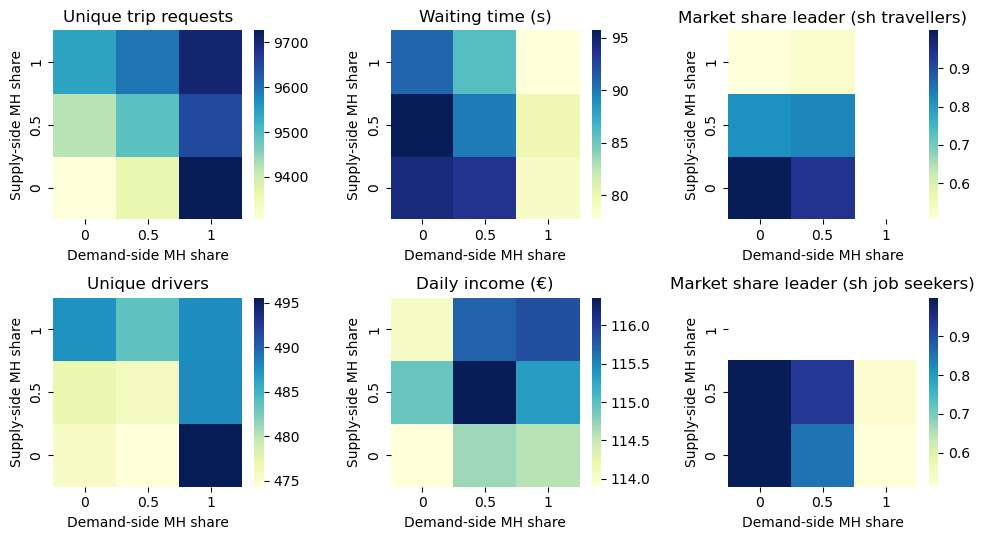

In [40]:
select_dem_cols = ['unique_requests', 'xp_wait','req_rel_largest']
select_sup_cols = ['unique_drivers', 'exp_inc', 'ptcp_rel_largest']

select_df = pd.concat([df_dem[['dem_mh_share','sup_mh_share']], df_dem[select_dem_cols], df_sup[select_sup_cols]], axis=1)

# select_df['dem_mh_share'] = select_df['dem_mh_share'] * 100
# select_df['sup_mh_share'] = select_df['sup_mh_share'] * 100

fig, axes = plt.subplots(2, len(select_dem_cols), figsize=(10, 5.5))

# Plot 0
pivot_df = select_df.pivot(index='sup_mh_share', columns='dem_mh_share', values='unique_requests')
sns.heatmap(pivot_df, cmap="YlGnBu", ax=axes[0, 0])  # Adjust cmap as needed
axes[0, 0].set_title('Unique trip requests')  # Set the title for each subplot
axes[0, 0].invert_yaxis()
axes[0, 0].set_xlabel('Demand-side MH share')
axes[0, 0].set_ylabel('Supply-side MH share')

# Plot 1
pivot_df = select_df.pivot(index='sup_mh_share', columns='dem_mh_share', values='xp_wait')
sns.heatmap(pivot_df, cmap="YlGnBu", ax=axes[0, 1])  # Adjust cmap as needed
axes[0, 1].set_title('Waiting time (s)')  # Set the title for each subplot
axes[0, 1].invert_yaxis()
axes[0, 1].set_xlabel('Demand-side MH share')
axes[0, 1].set_ylabel('Supply-side MH share')

# Plot 2
pivot_df = select_df.pivot(index='sup_mh_share', columns='dem_mh_share', values='req_rel_largest')
sns.heatmap(pivot_df, cmap="YlGnBu", ax=axes[0, 2])  # Adjust cmap as needed
axes[0, 2].set_title('Market share leader (sh travellers)')  # Set the title for each subplot
axes[0, 2].invert_yaxis()
axes[0, 2].set_xlabel('Demand-side MH share')
axes[0, 2].set_ylabel('Supply-side MH share')

# Plot 3
pivot_df = select_df.pivot(index='sup_mh_share', columns='dem_mh_share', values='unique_drivers')
sns.heatmap(pivot_df, cmap="YlGnBu", ax=axes[1, 0])  # Adjust cmap as needed
axes[1, 0].set_title('Unique drivers')  # Set the title for each subplot
axes[1, 0].invert_yaxis()
axes[1, 0].set_xlabel('Demand-side MH share')
axes[1, 0].set_ylabel('Supply-side MH share')

# Plot 4
pivot_df = select_df.pivot(index='sup_mh_share', columns='dem_mh_share', values='exp_inc')
sns.heatmap(pivot_df, cmap="YlGnBu", ax=axes[1, 1])  # Adjust cmap as needed
axes[1, 1].set_title('Daily income (€)')  # Set the title for each subplot
axes[1, 1].invert_yaxis()
axes[1, 1].set_xlabel('Demand-side MH share')
axes[1, 1].set_ylabel('Supply-side MH share')

# Plot 5
pivot_df = select_df.pivot(index='sup_mh_share', columns='dem_mh_share', values='ptcp_rel_largest')
sns.heatmap(pivot_df, cmap="YlGnBu", ax=axes[1, 2])  # Adjust cmap as needed
axes[1, 2].set_title('Market share leader (sh job seekers)')  # Set the title for each subplot
axes[1, 2].invert_yaxis()
axes[1, 2].set_xlabel('Demand-side MH share')
axes[1, 2].set_ylabel('Supply-side MH share')

plt.tight_layout()  # Adjust layout
plt.show()

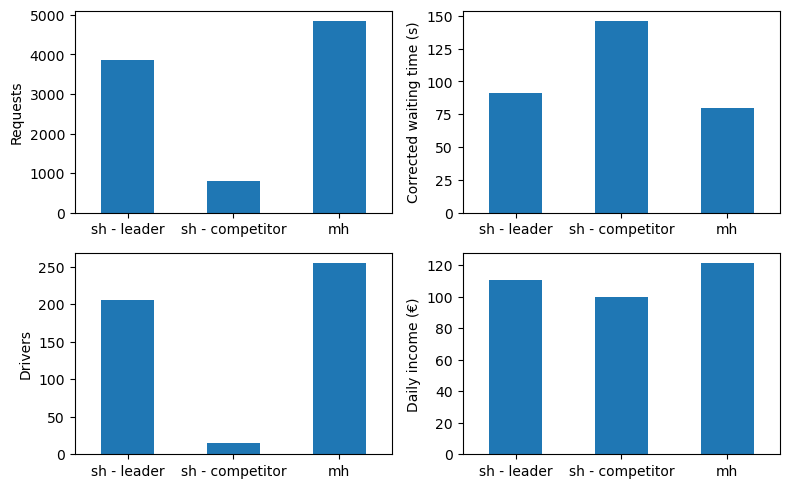

exp_inc_sh_largest      110.916817
exp_inc_sh_smallest     100.028157
exp_inc_mh              121.719038
perc_inc_sh_largest     110.810457
perc_inc_sh_smallest    100.263217
perc_inc_mh             121.581181
Name: 0.5_0.5_ss, dtype: object

In [47]:
## Subplots separating single-homing and multi-homing agents for a specific scenario (50-50 for supply and demand)
inv_scn = '0.5_0.5_{}'.format(var_dict['cmpt_type'][0])

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))

df_dem.loc[inv_scn][['requests_sh_largest','requests_sh_smallest', 'requests_mh']].plot.bar(ax = axes[0,0])
axes[0, 0].set_xticklabels(['sh - leader', 'sh - competitor', 'mh'])
axes[0, 0].set_ylabel('Requests')

df_dem.loc[inv_scn][['exp_corr_wait_sh_largest','exp_corr_wait_sh_smallest', 'exp_corr_wait_mh']].plot.bar(ax = axes[0,1])
axes[0, 1].set_xticklabels(['sh - leader', 'sh - competitor', 'mh'])
axes[0, 1].set_ylabel('Corrected waiting time (s)')

# df_dem.loc[inv_scn][['perc_wait_sh_largest','perc_wait_sh_smallest', 'perc_wait_mh']].plot.bar(ax = axes[0,2])
# axes[0, 2].set_xticklabels(['sh - large', 'sh - small', 'mh'])
# axes[0, 2].set_ylabel('Perceived waiting time (s)')

df_sup.loc[inv_scn][['ptcp_sh_largest','ptcp_sh_smallest', 'ptcp_mh']].plot.bar(ax = axes[1,0])
axes[1, 0].set_xticklabels(['sh - leader', 'sh - competitor', 'mh'])
axes[1, 0].set_ylabel('Drivers')

df_sup.loc[inv_scn][['exp_inc_sh_largest','exp_inc_sh_smallest', 'exp_inc_mh']].plot.bar(ax = axes[1,1])
axes[1, 1].set_xticklabels(['sh - leader', 'sh - competitor', 'mh'])
axes[1, 1].set_ylabel('Daily income (€)')

# df_sup.loc[inv_scn][['perc_inc_sh_largest','perc_inc_sh_smallest', 'perc_inc_mh']].plot.bar(ax = axes[1,2])
# axes[1, 2].set_xticklabels(['sh - large', 'sh - small', 'mh'])
# axes[1, 2].set_ylabel('Perceived income (euro)')

for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=0)

# plt.xticks(rotation=0)
# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Display the plot
plt.show()

df_sup.loc[inv_scn][['exp_inc_sh_largest','exp_inc_sh_smallest', 'exp_inc_mh','perc_inc_sh_largest','perc_inc_sh_smallest', 'perc_inc_mh']]

In [41]:
df_dem.keys()

Index(['informed', 'requests_0', 'requests_1', 'gets_offer_0', 'gets_offer_1',
       'accepts_offer_0', 'accepts_offer_1', 'registered_0', 'registered_1',
       'car', 'pt', 'bike', 'time_occ_1', 'days_since_reg', 'xp_wait_0',
       'xp_wait_1', 'corr_xp_wait_0', 'corr_xp_wait_1', 'xp_ivt_0', 'xp_ivt_1',
       'xp_km_fare_0', 'xp_km_fare_1', 'expected_wait_0', 'expected_wait_1',
       'expected_ivt_0', 'expected_ivt_1', 'expected_km_fare_0',
       'expected_km_fare_1', 'informed_mh', 'informed_sh', 'registered_mh',
       'registered_sh_0', 'registered_sh_1', 'requests_mh', 'requests_sh_0',
       'requests_sh_1', 'requests_sh_largest', 'gets_offer_mh_0',
       'gets_offer_mh_1', 'gets_offer_mh_largest', 'gets_offer_sh_0',
       'gets_offer_sh_1', 'accepts_offer_mh_0', 'accepts_offer_mh_1',
       'accepts_offer_mh_largest', 'exp_wait_mh', 'exp_wait_sh_0',
       'exp_wait_sh_1', 'exp_wait_sh_largest', 'exp_wait_sh_smallest',
       'exp_corr_wait_mh', 'exp_corr_wait_sh_0', 'ex

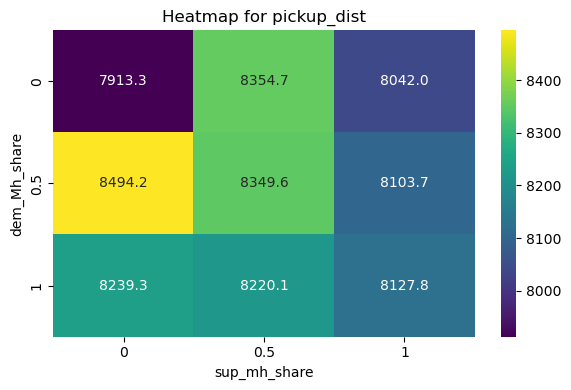

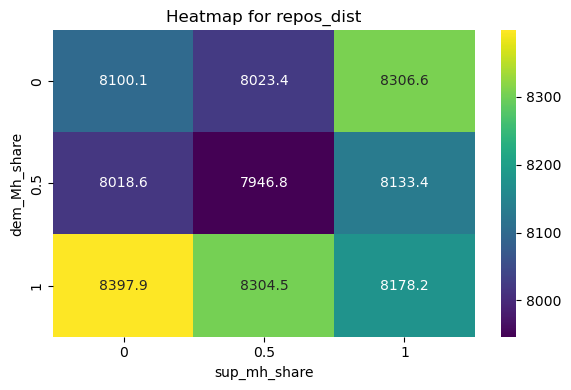

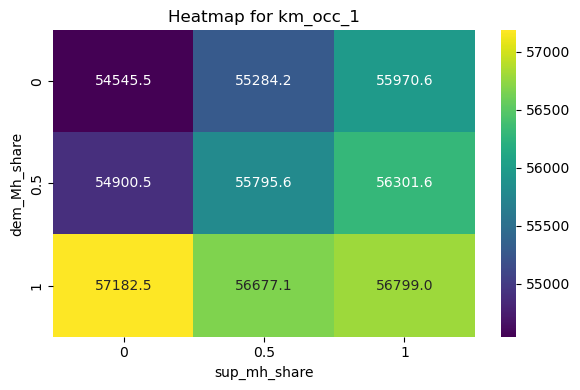

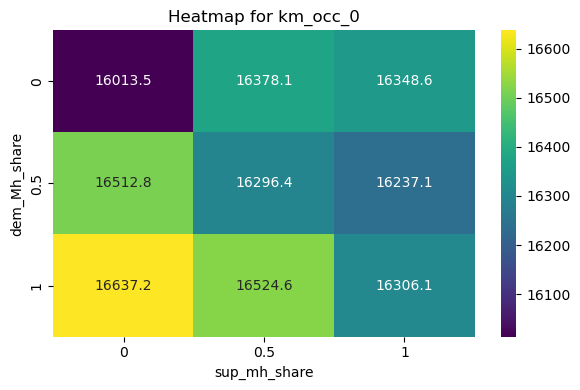

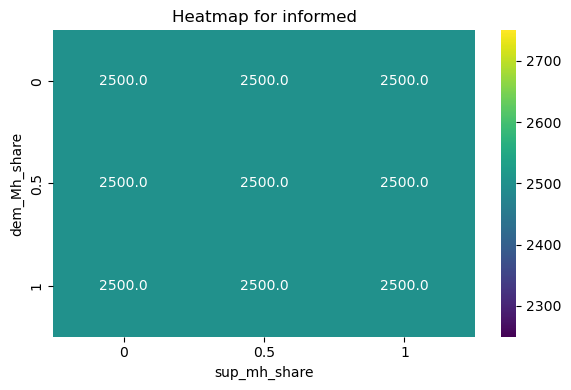

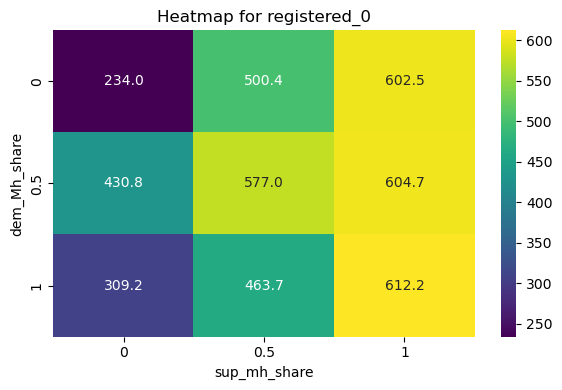

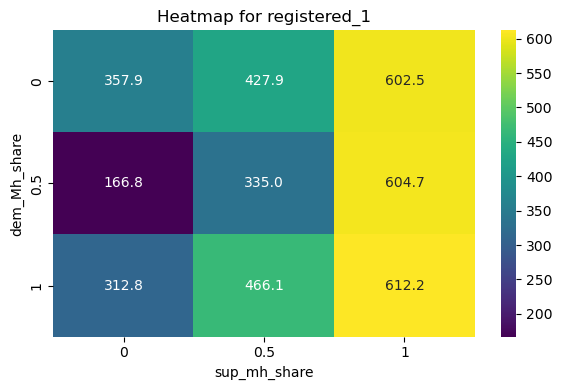

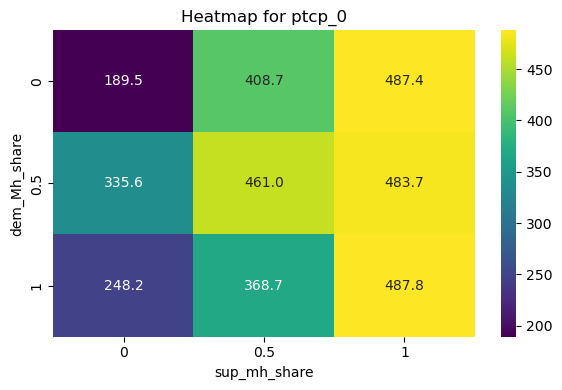

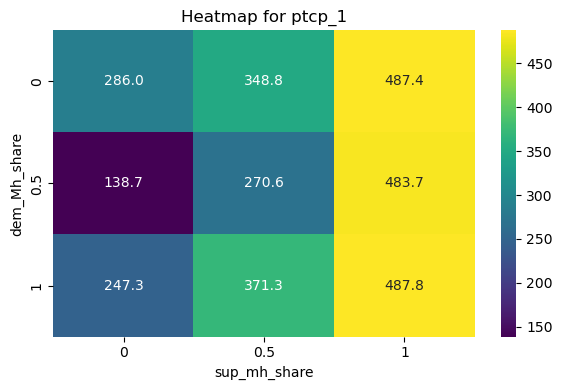

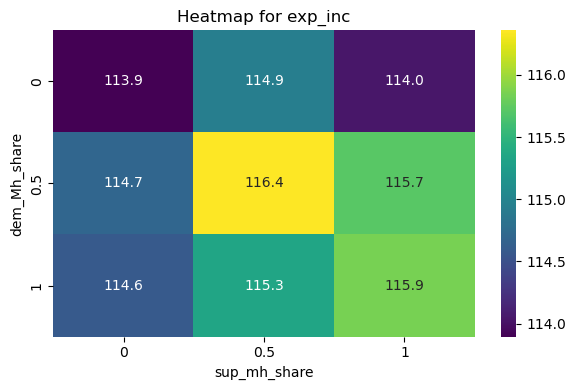

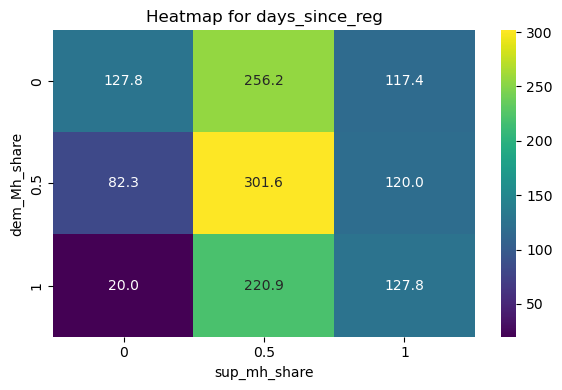

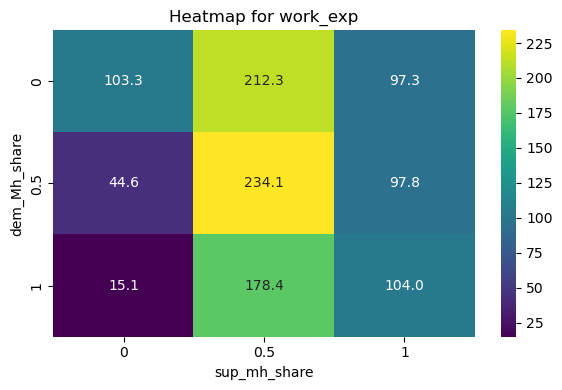

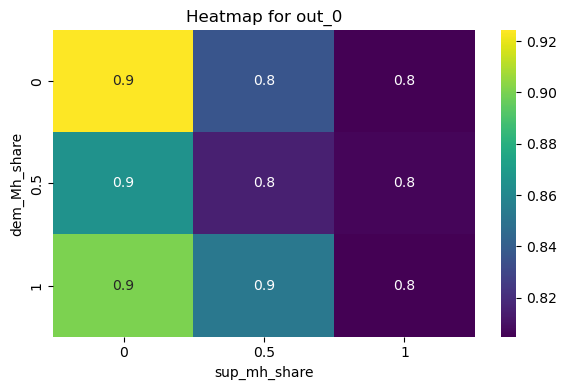

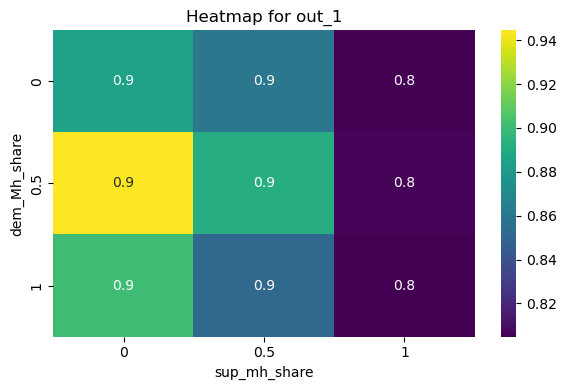

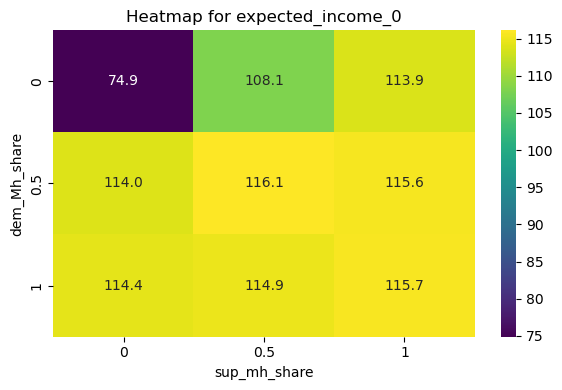

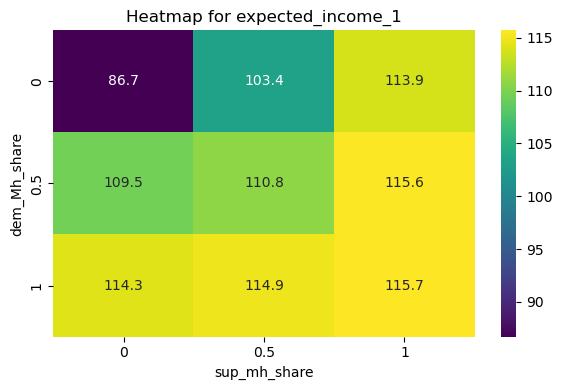

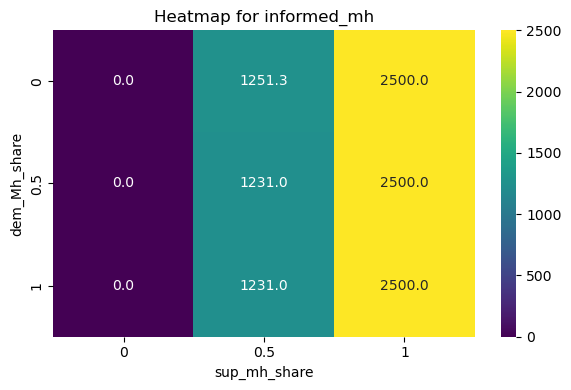

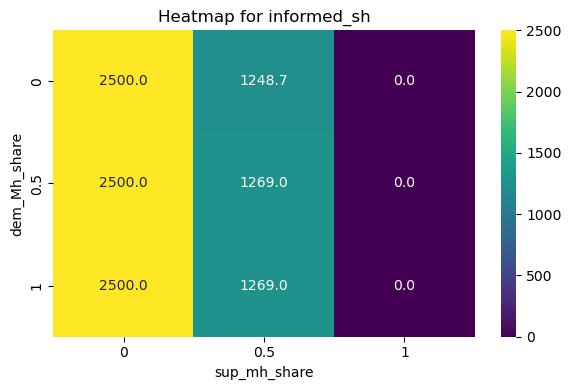

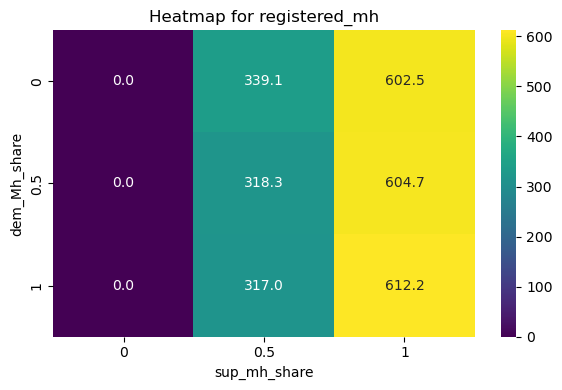

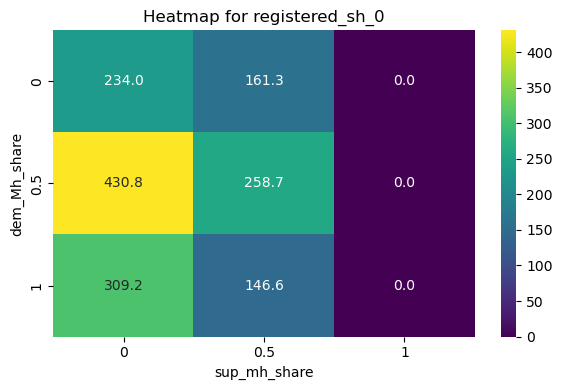

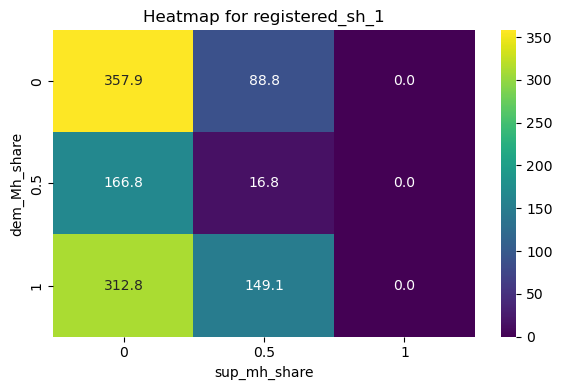

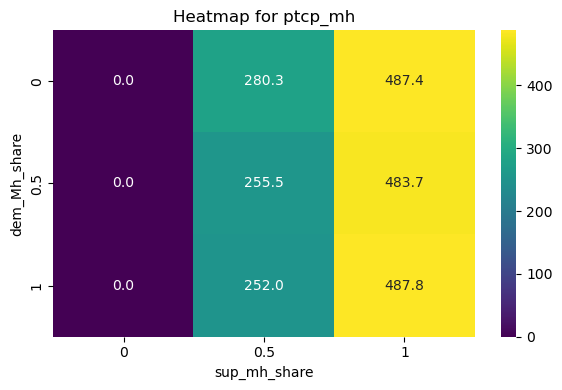

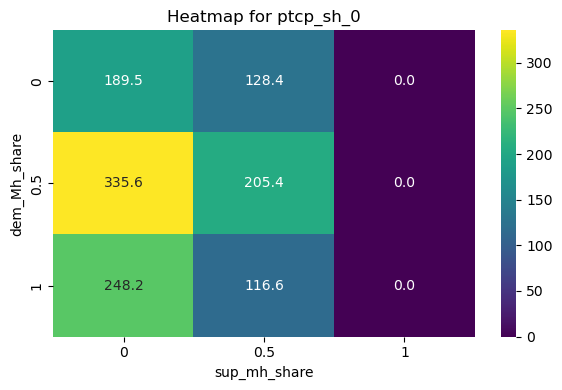

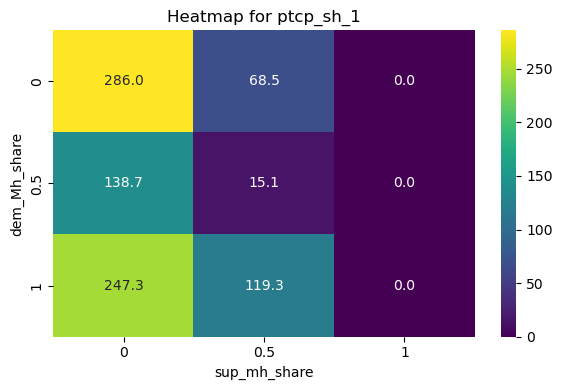

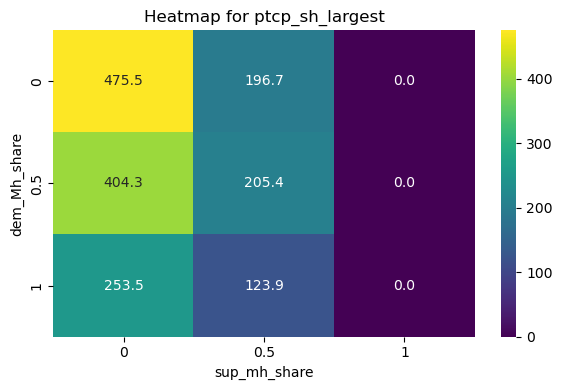

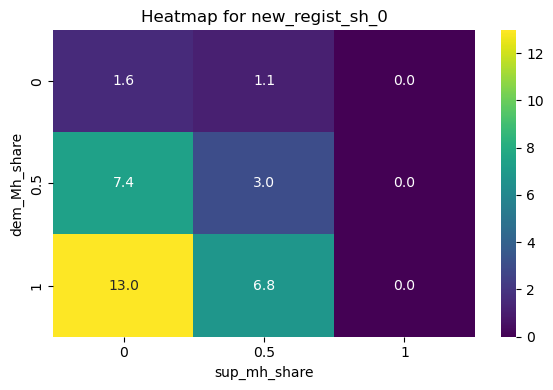

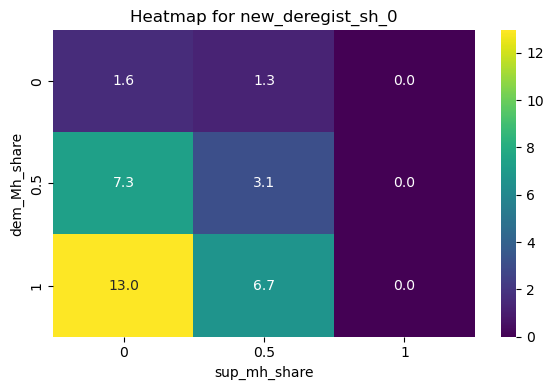

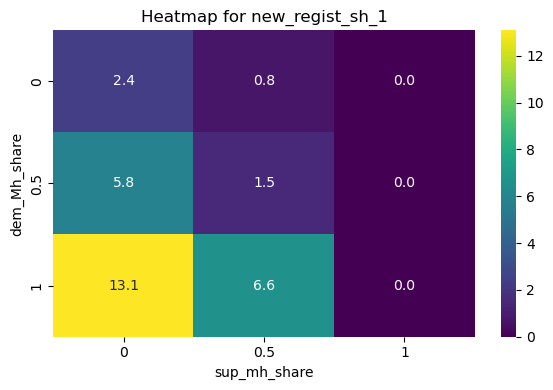

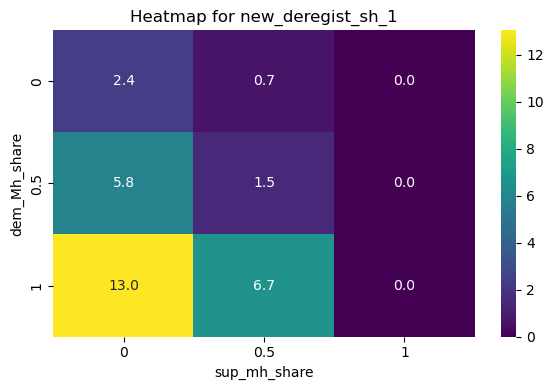

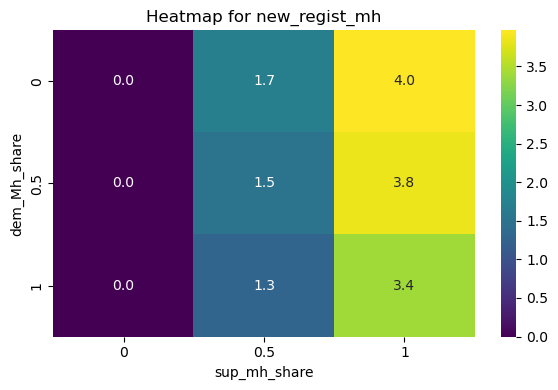

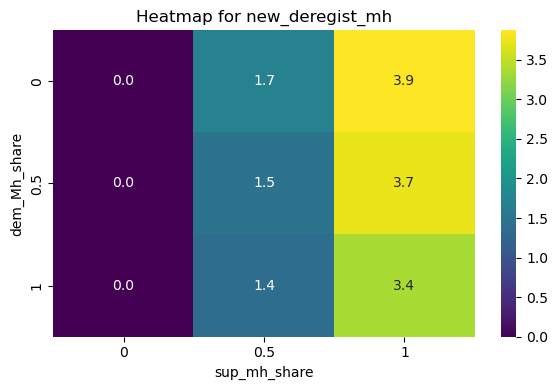

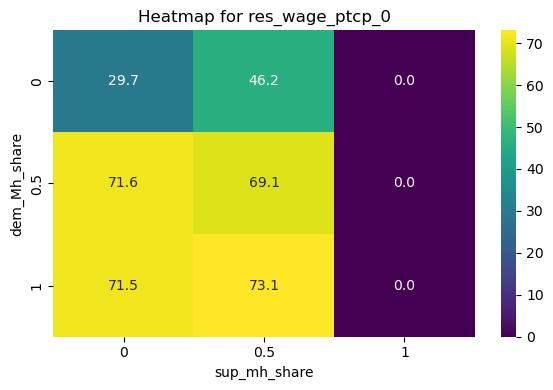

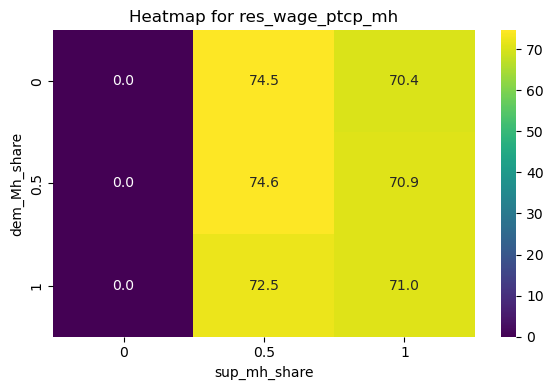

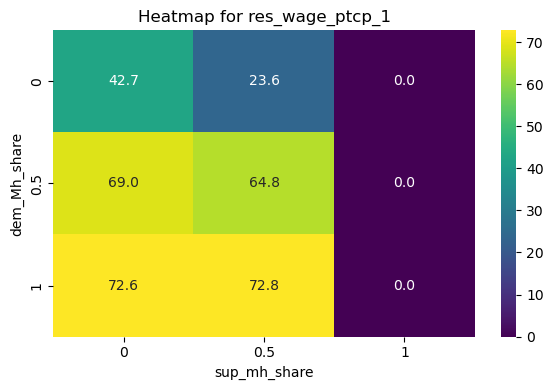

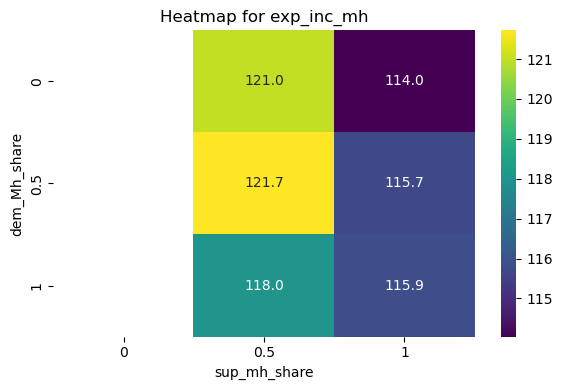

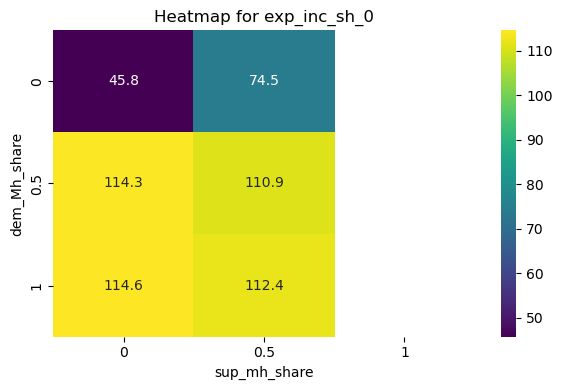

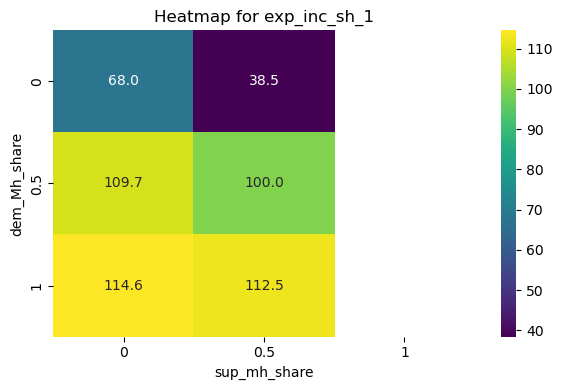

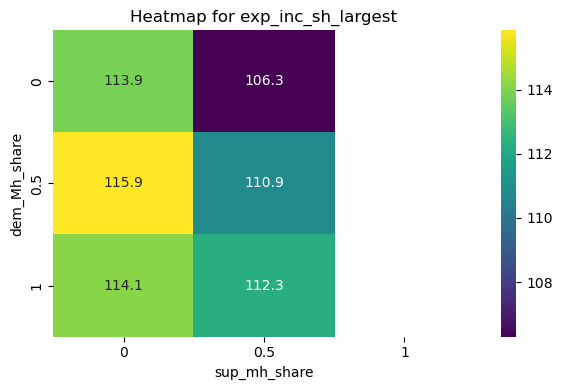

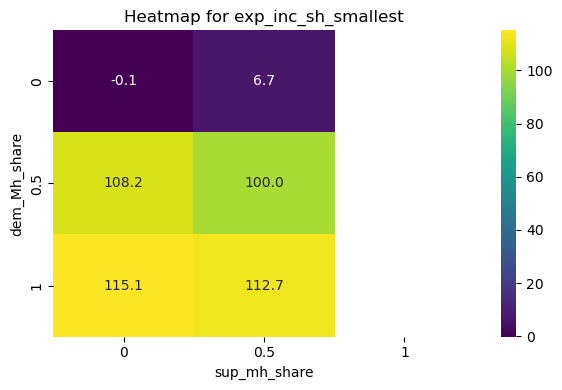

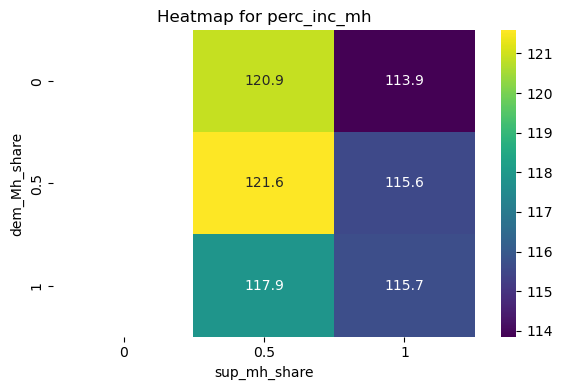

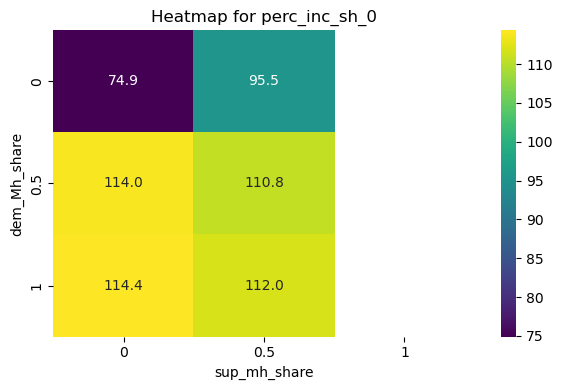

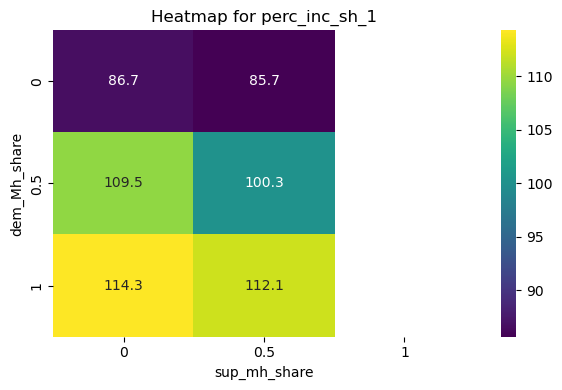

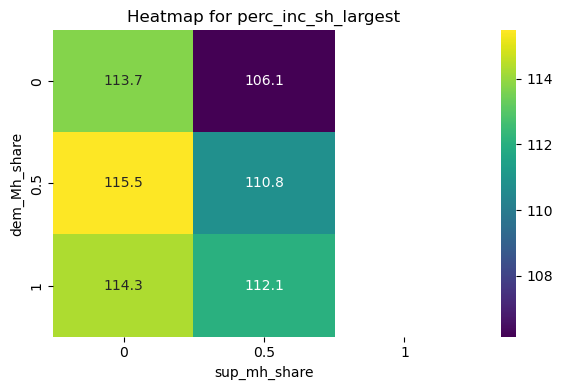

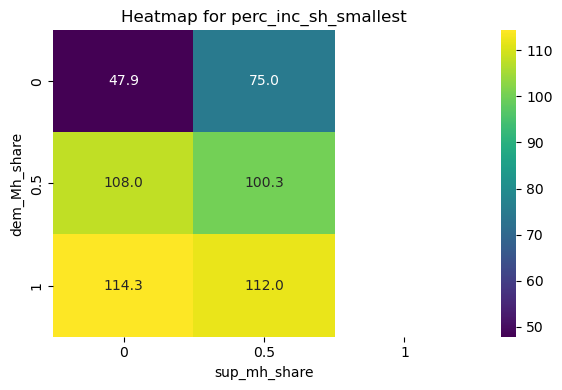

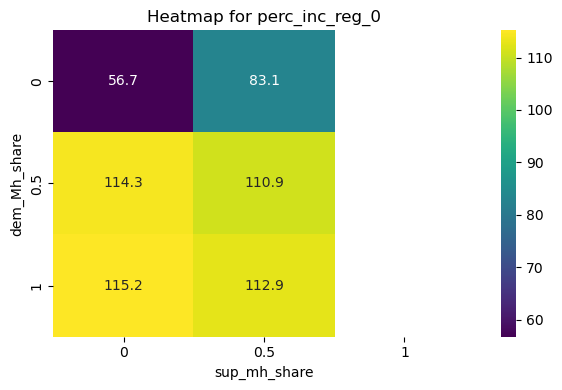

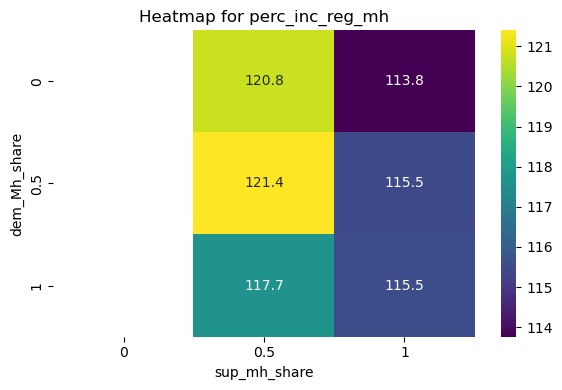

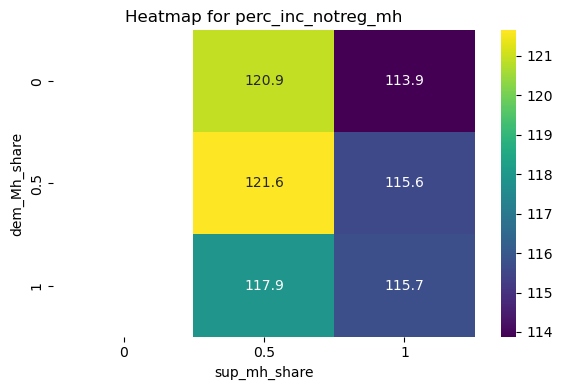

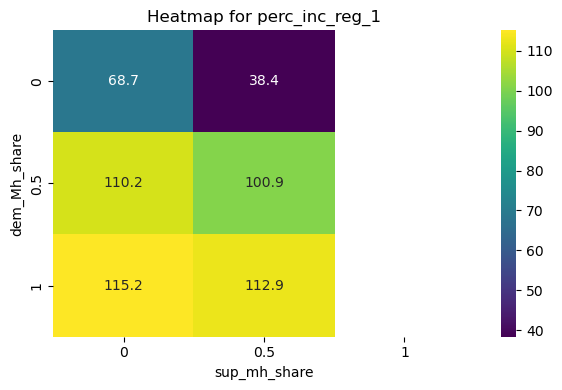

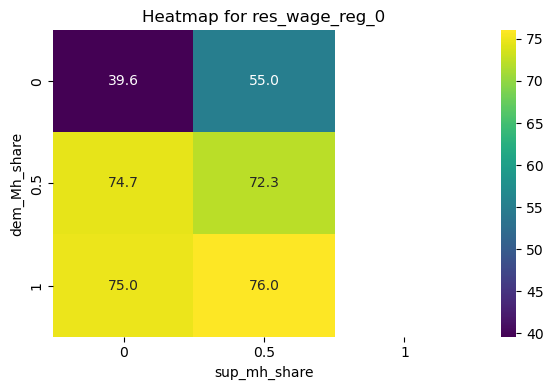

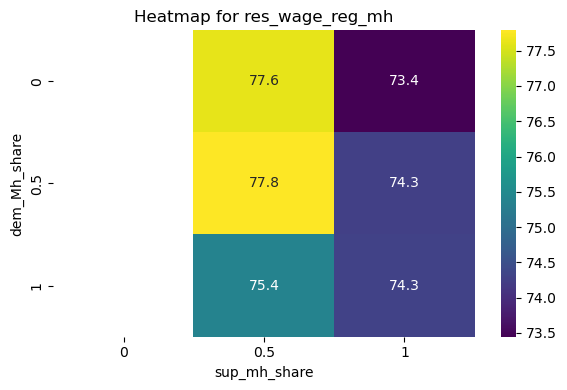

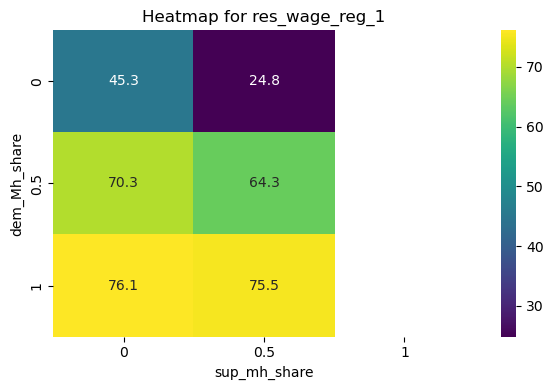

In [34]:

# Loop through columns and create heatmaps
for col in filtered_columns_sup:
    pivot_df = df_sup.pivot(index='dem_mh_share', columns='sup_mh_share', values=col)
    plt.figure(figsize=(6, 4))
    sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt='.1f')
    plt.title(f'Heatmap for {col}')
    plt.xlabel('sup_mh_share')
    plt.ylabel('dem_Mh_share')
    plt.tight_layout()
    plt.show()

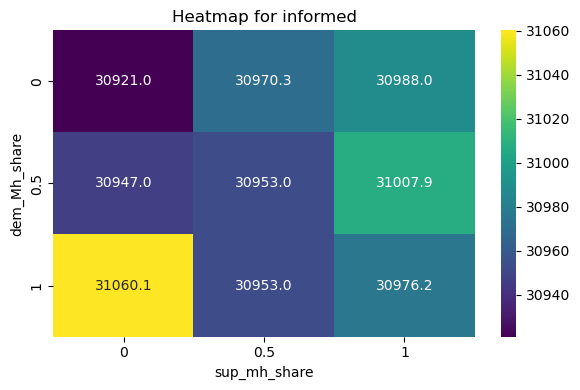

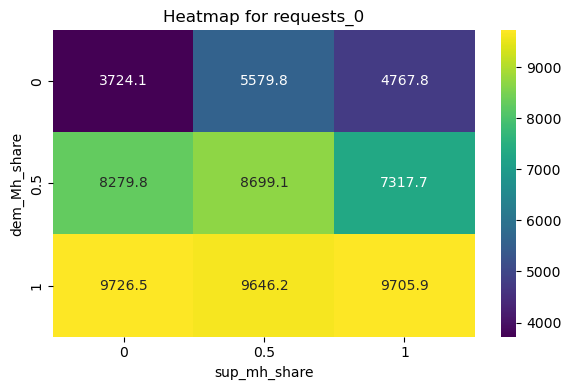

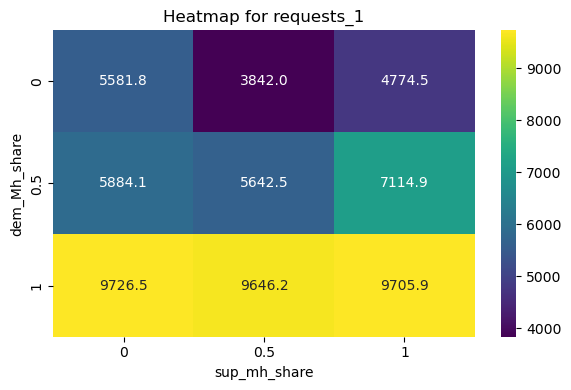

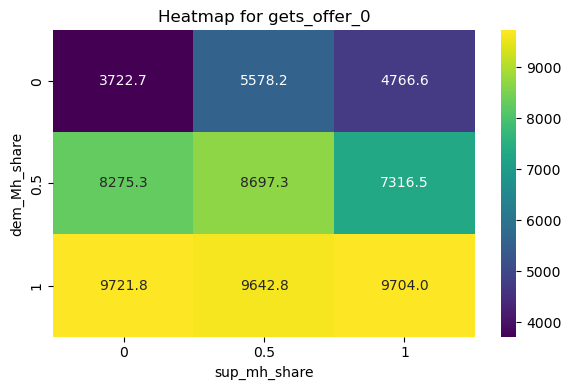

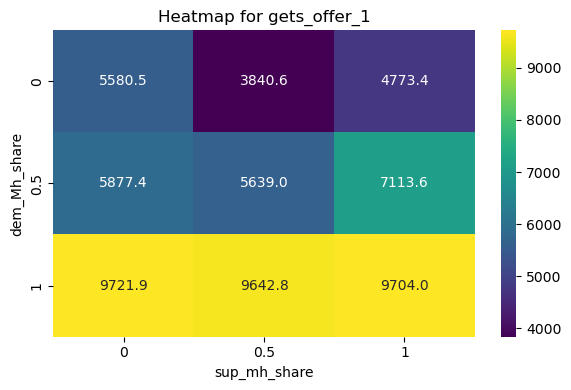

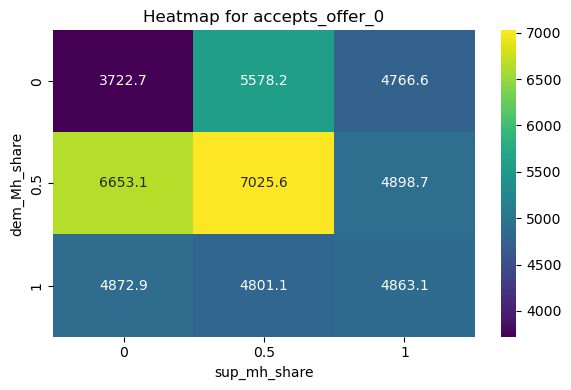

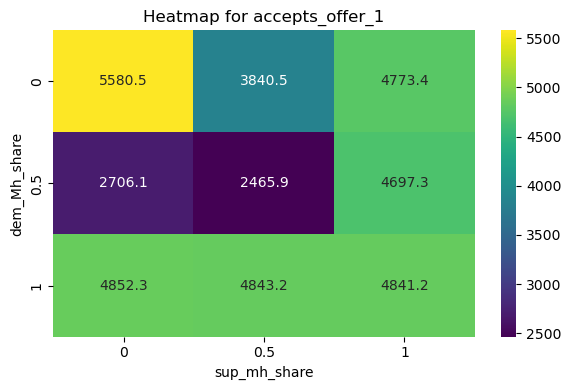

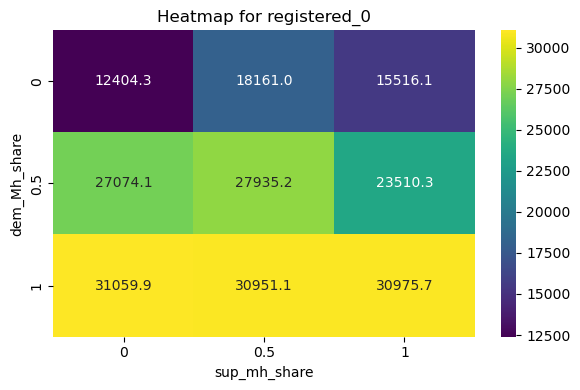

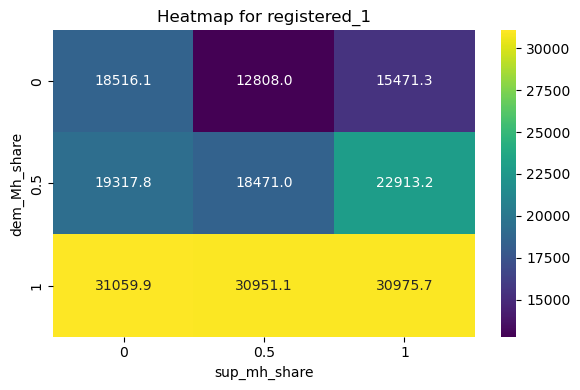

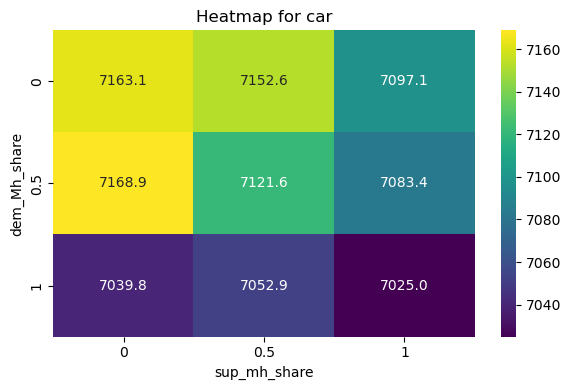

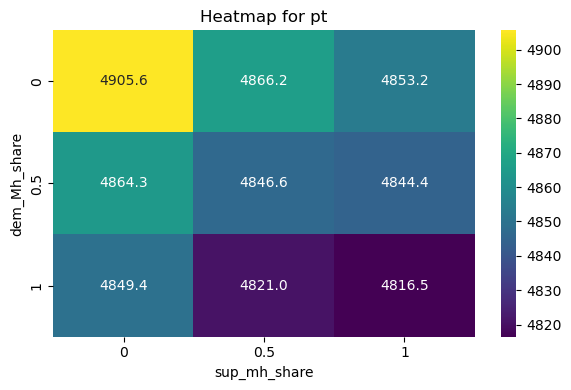

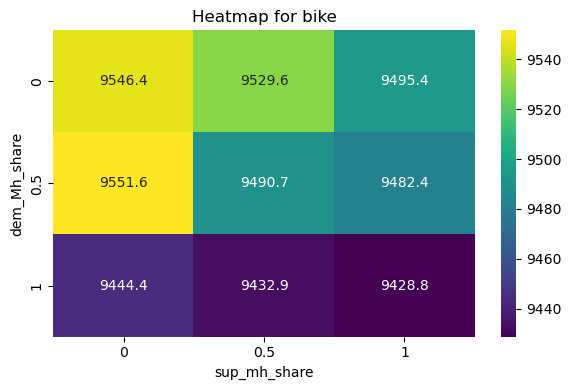

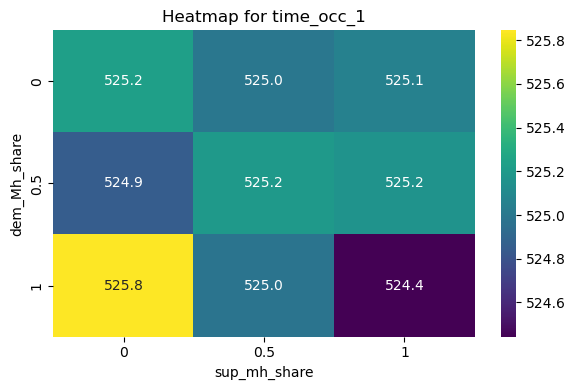

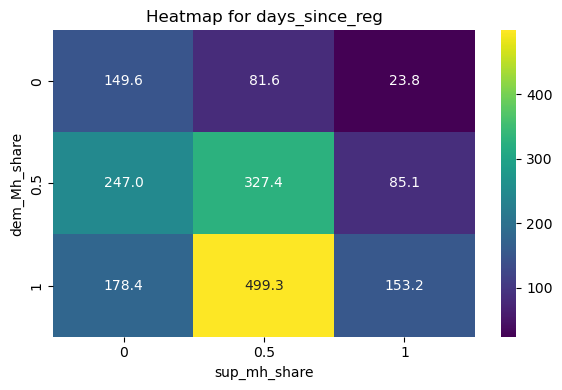

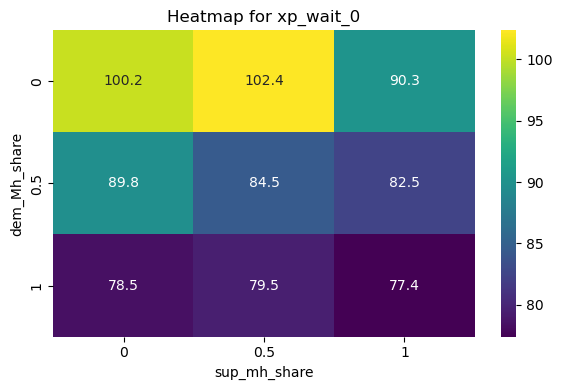

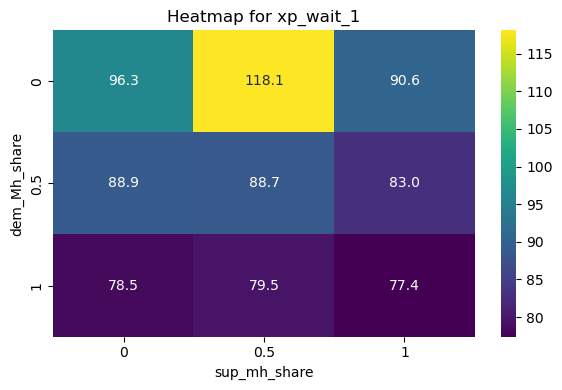

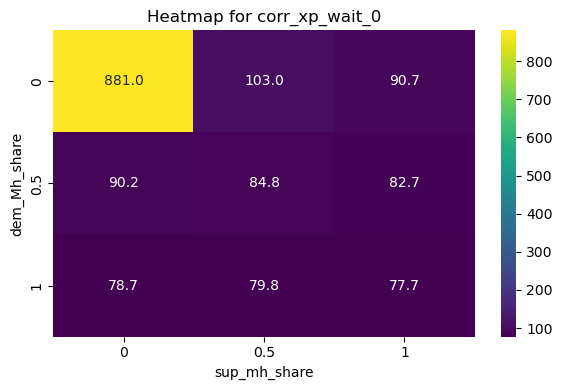

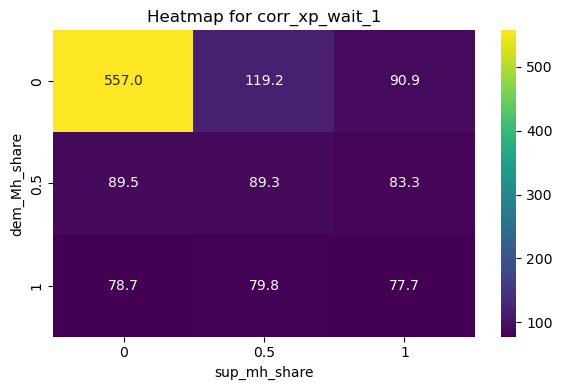

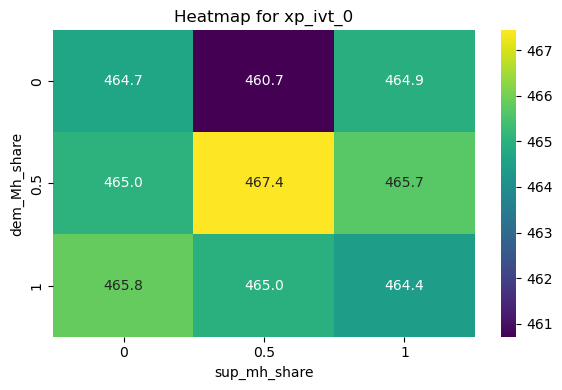

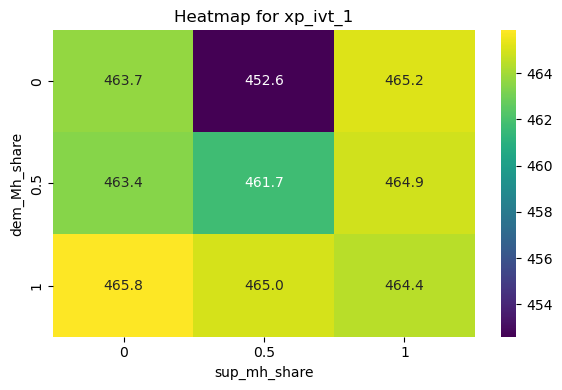

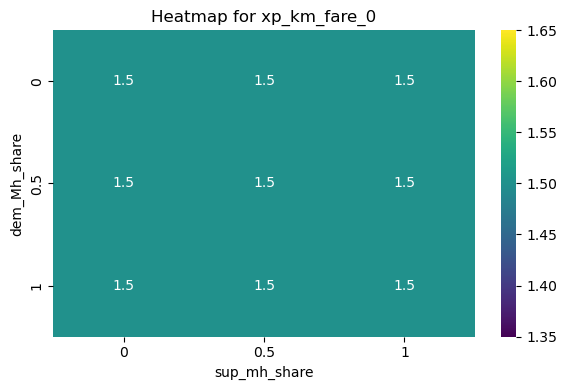

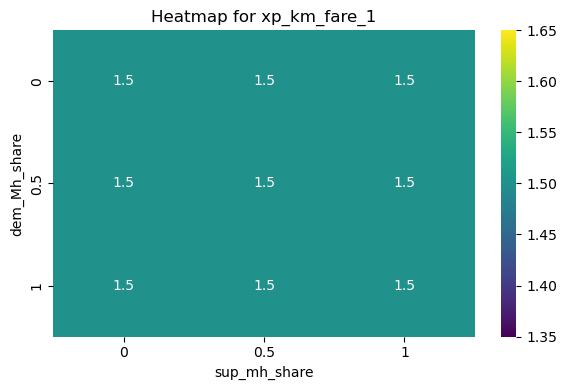

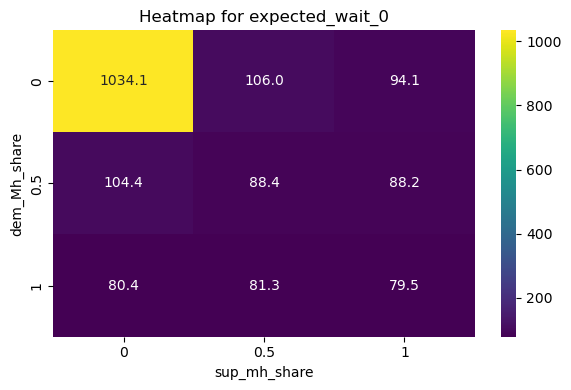

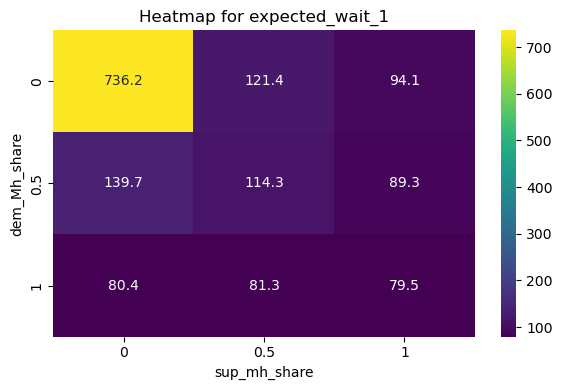

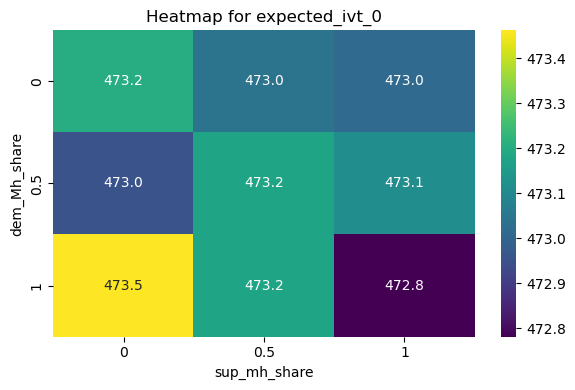

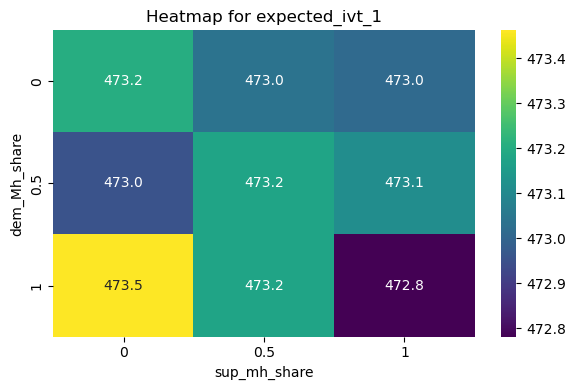

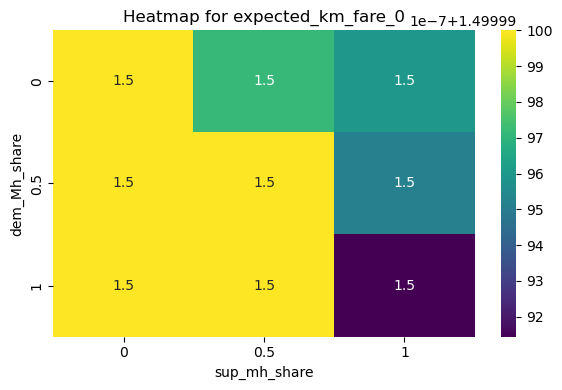

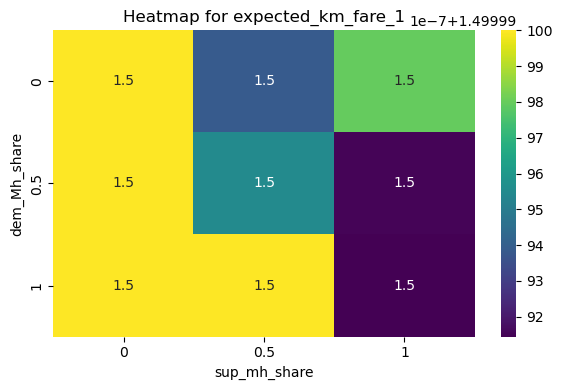

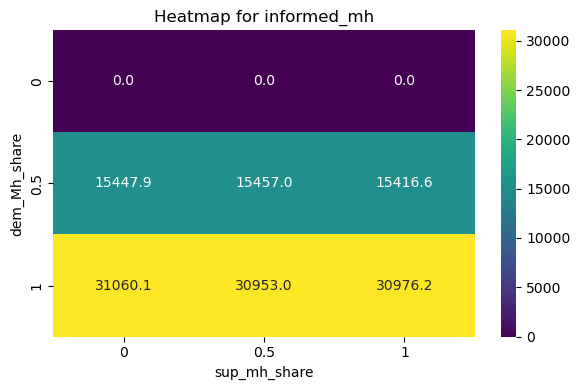

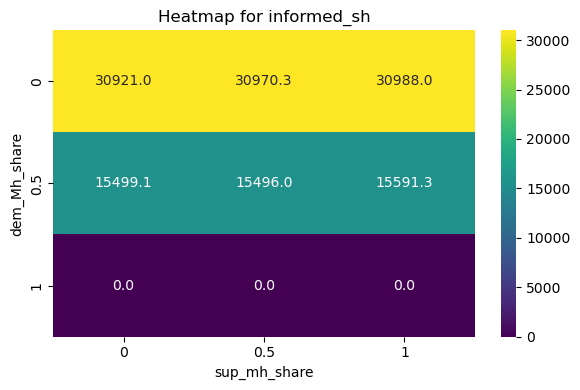

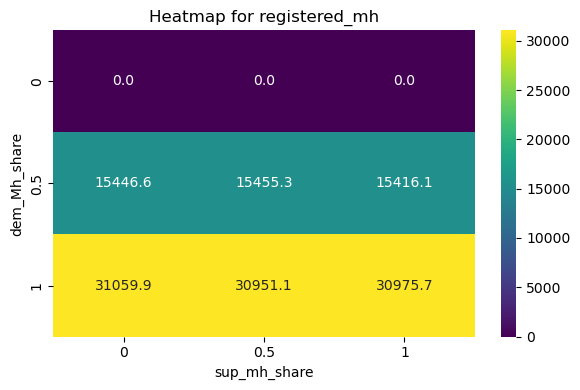

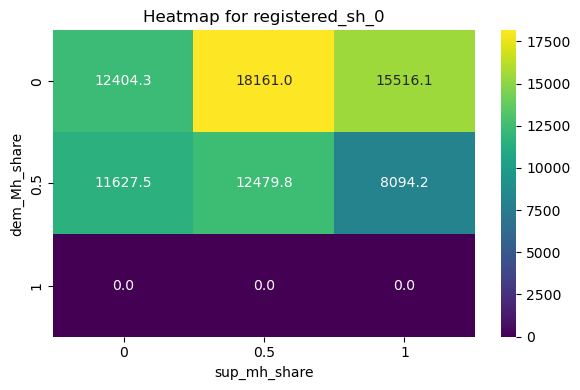

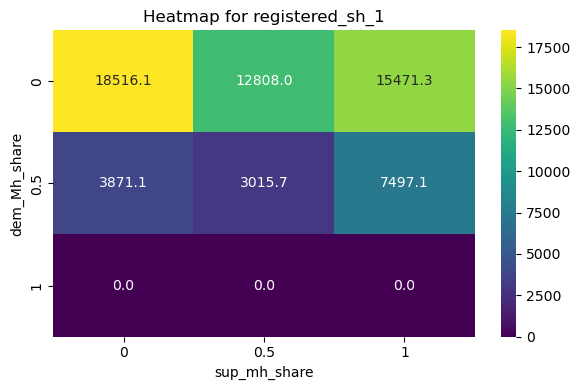

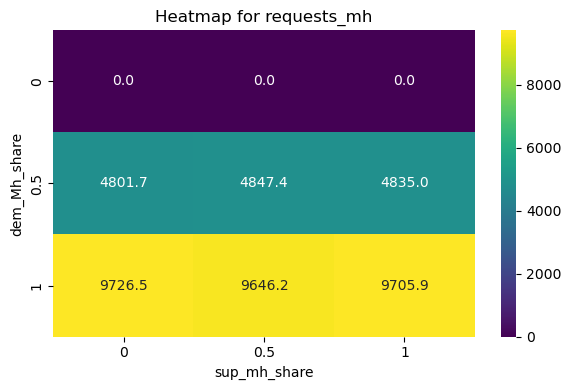

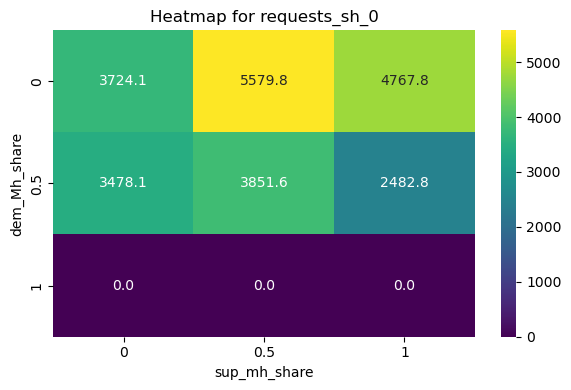

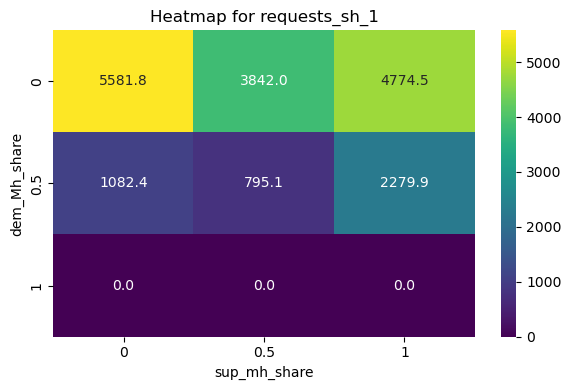

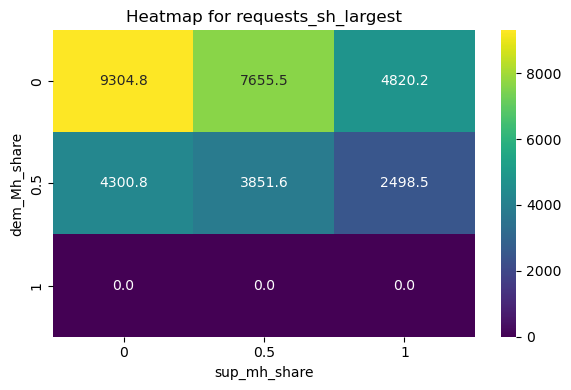

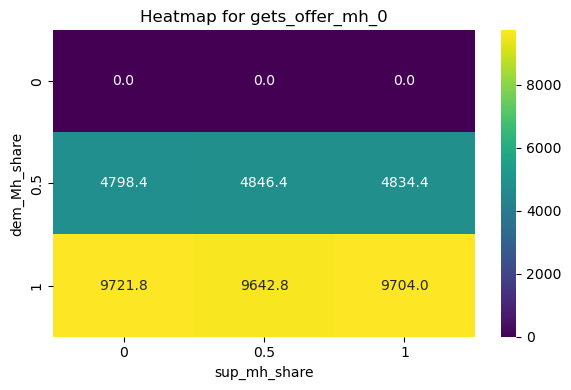

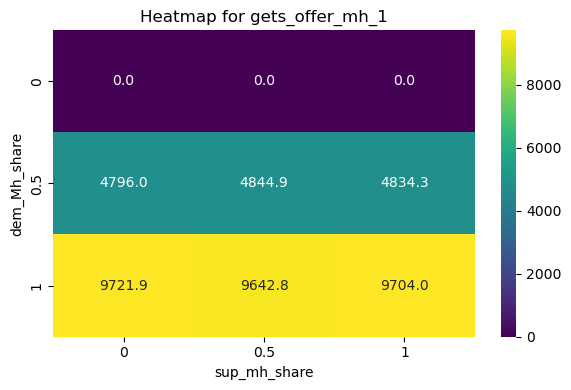

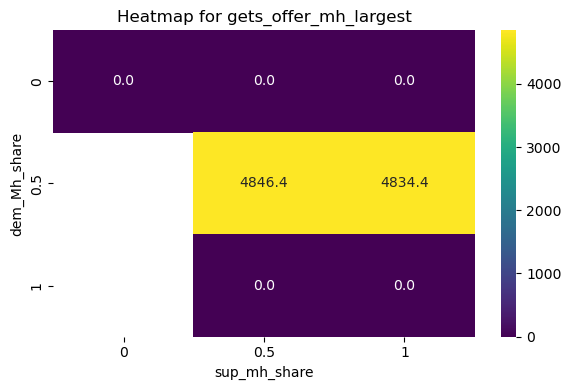

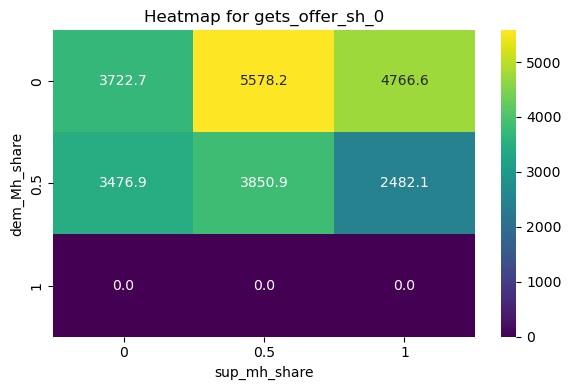

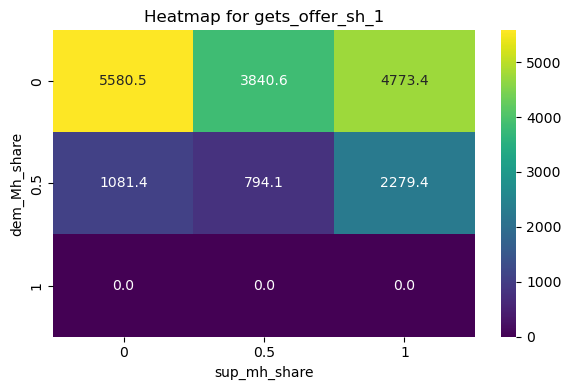

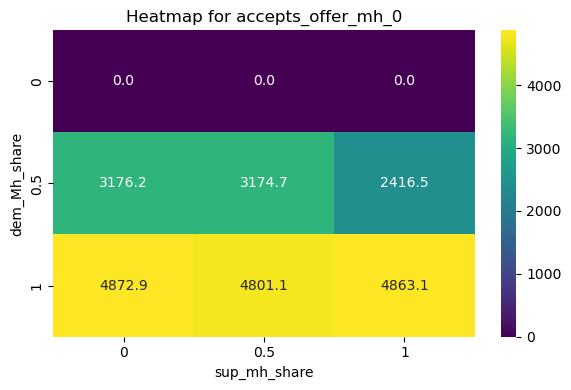

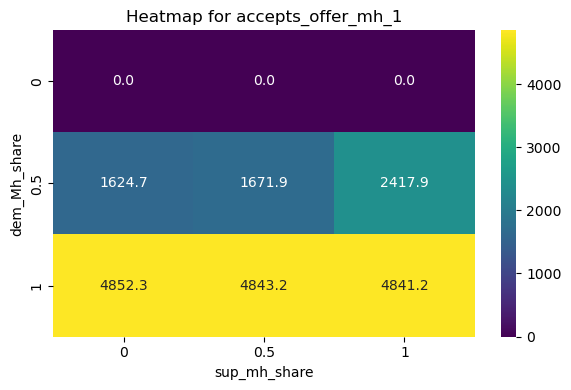

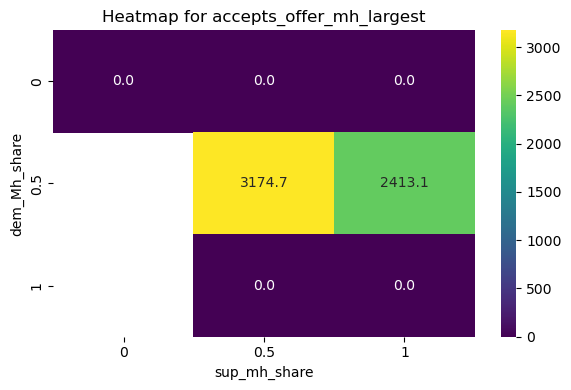

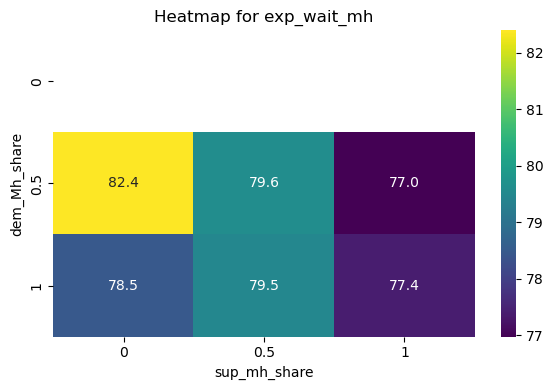

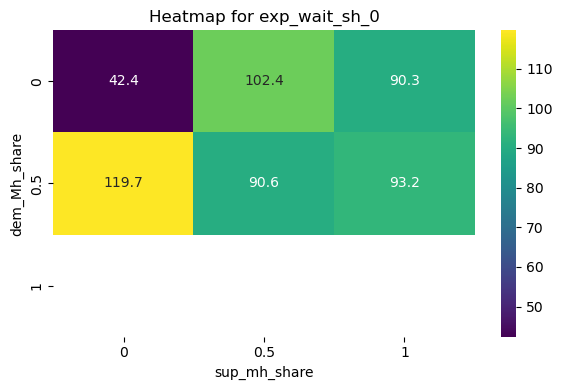

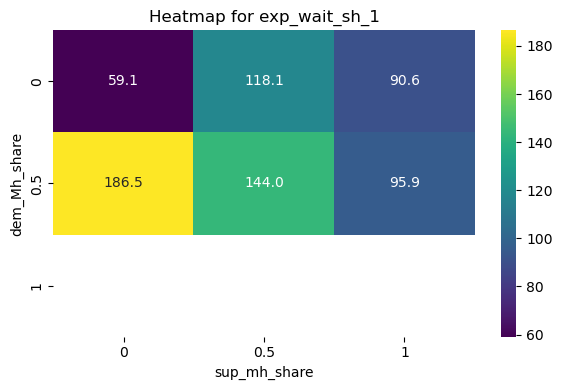

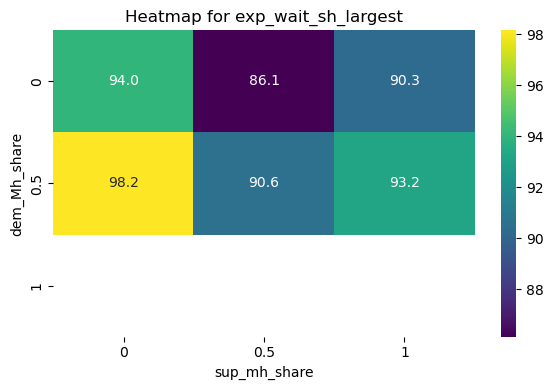

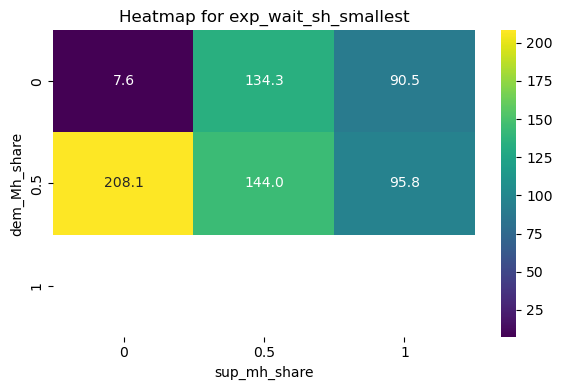

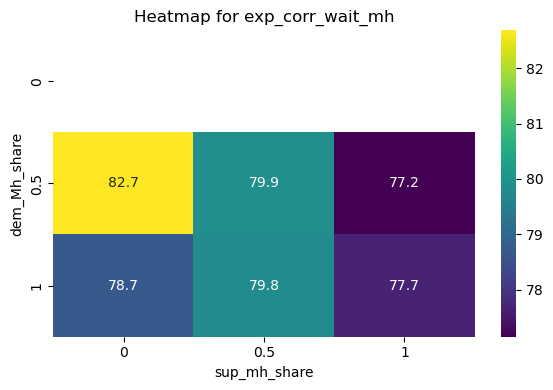

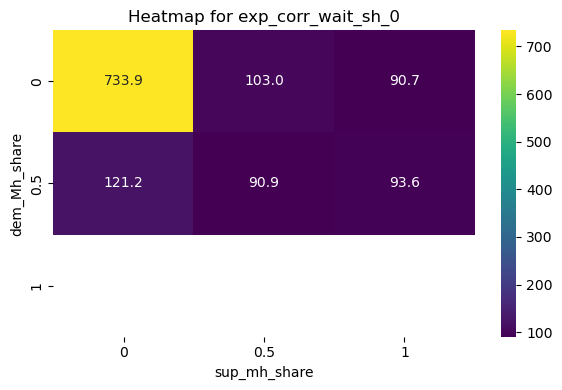

c:\Users\ge27fus\.conda\envs\fleetmaas_eval\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\ge27fus\.conda\envs\fleetmaas_eval\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


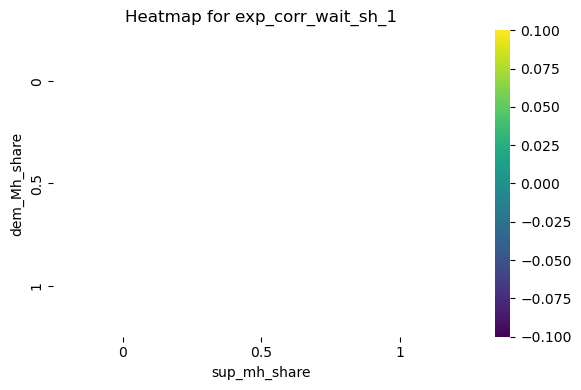

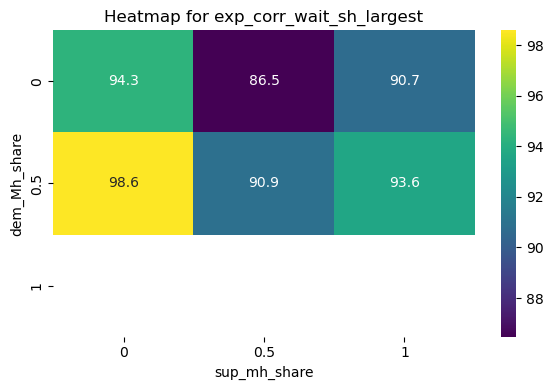

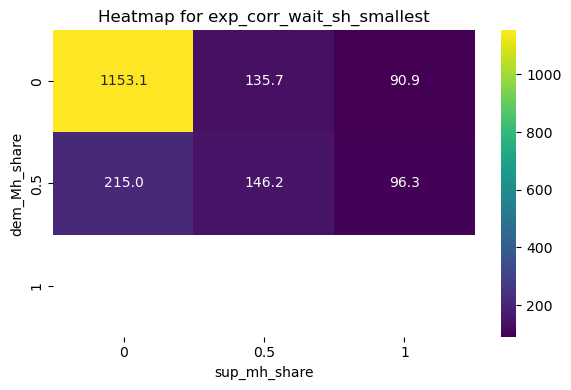

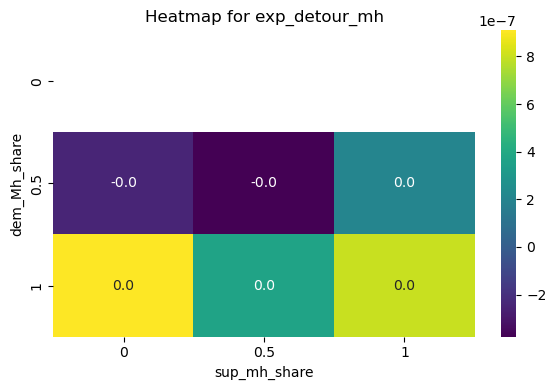

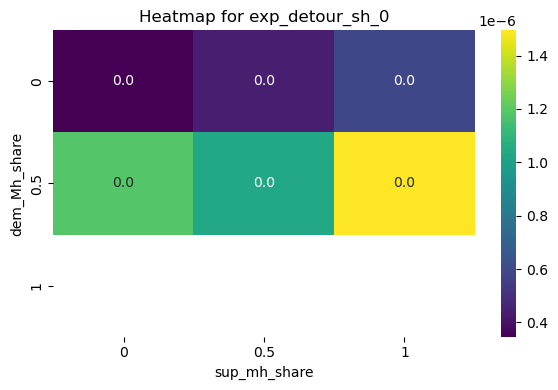

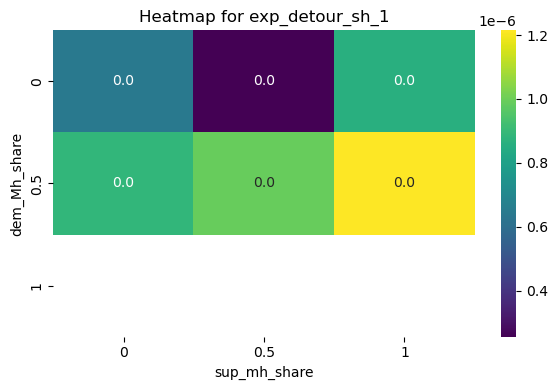

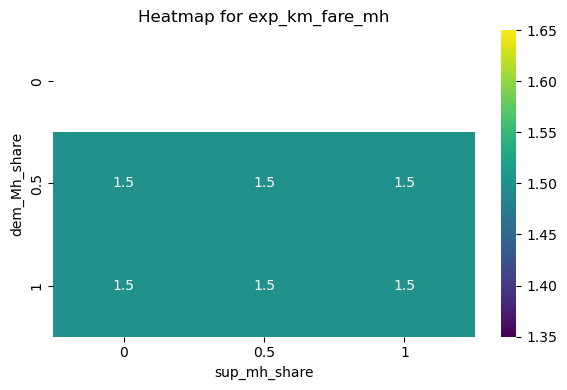

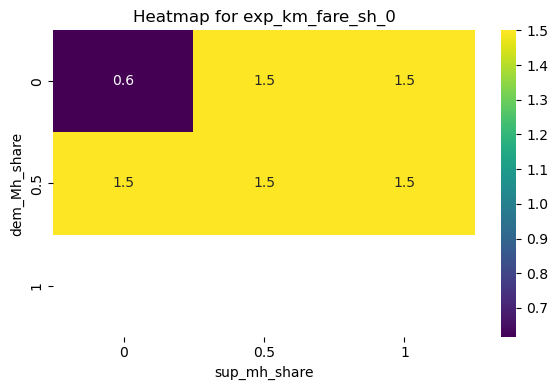

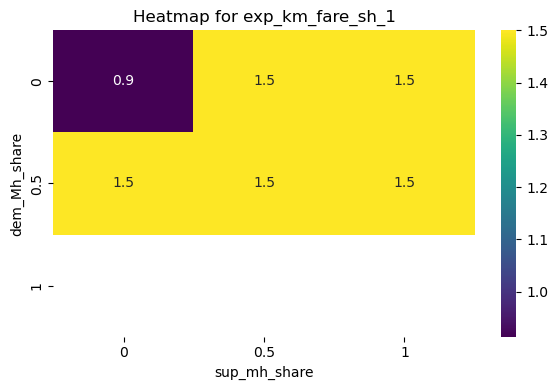

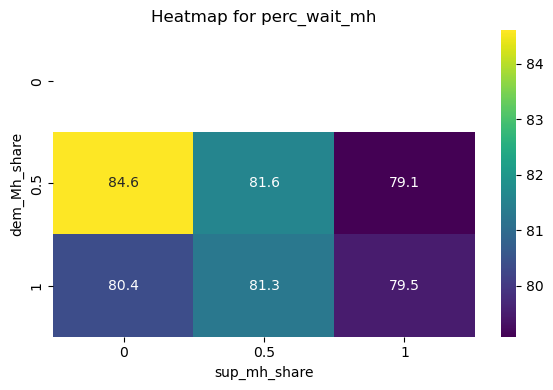

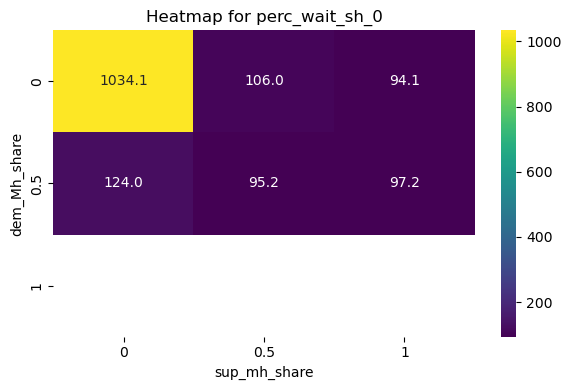

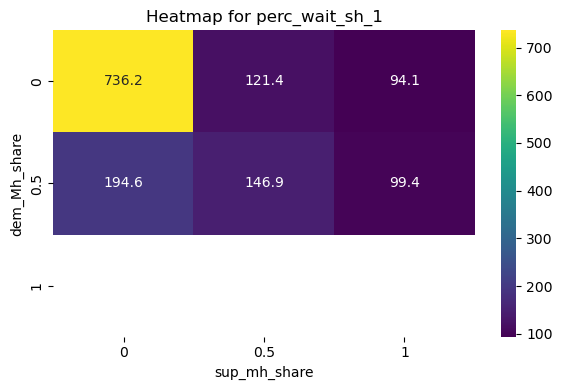

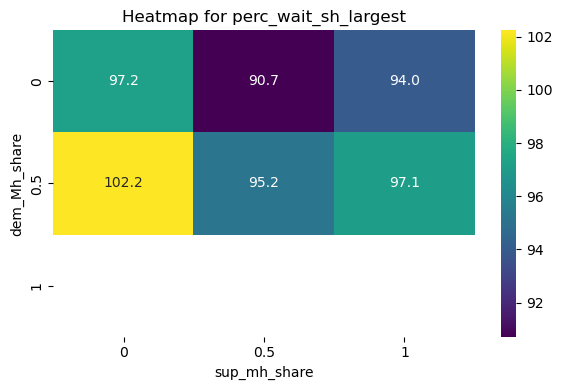

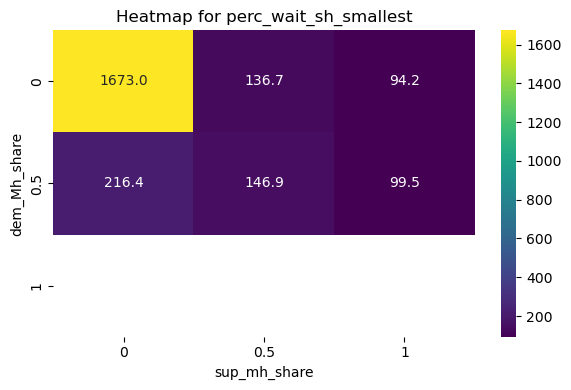

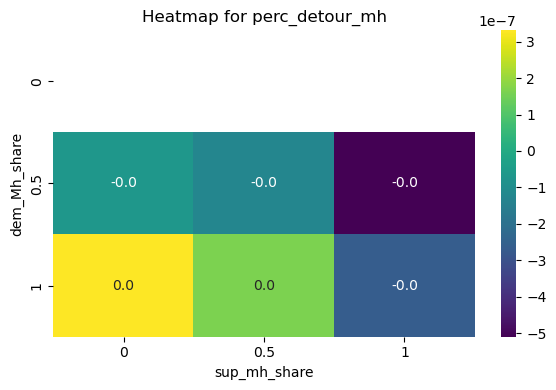

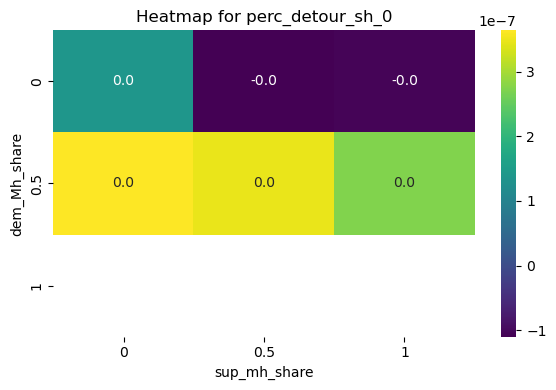

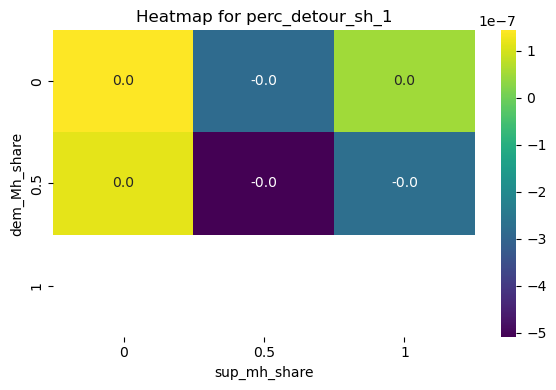

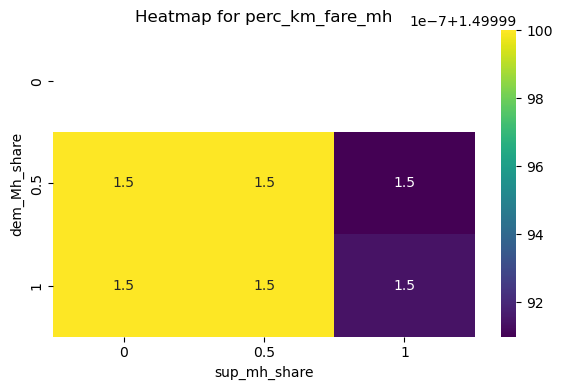

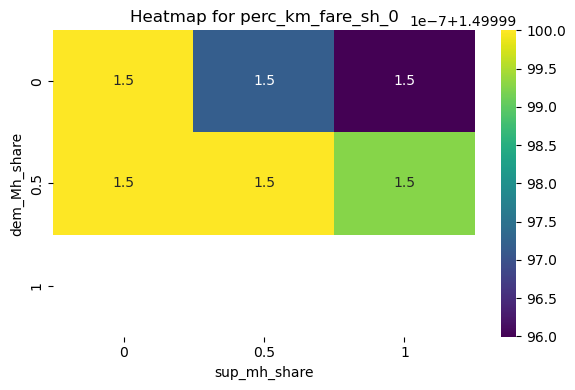

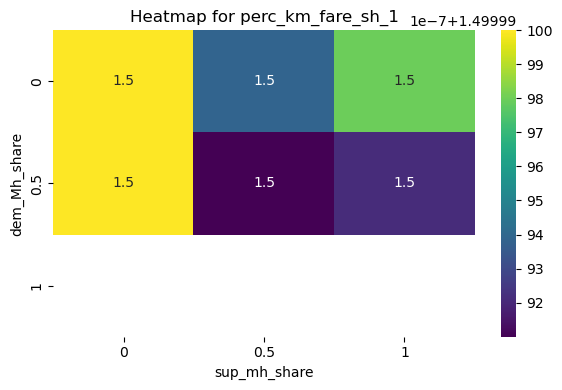

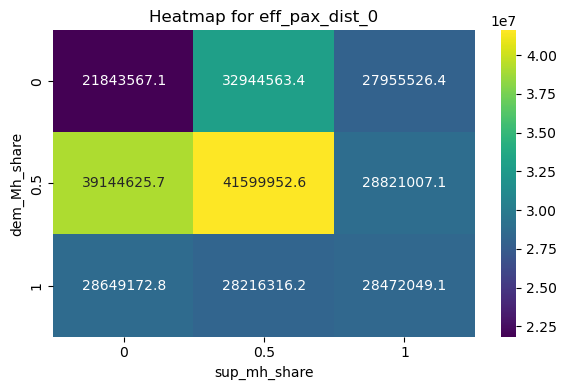

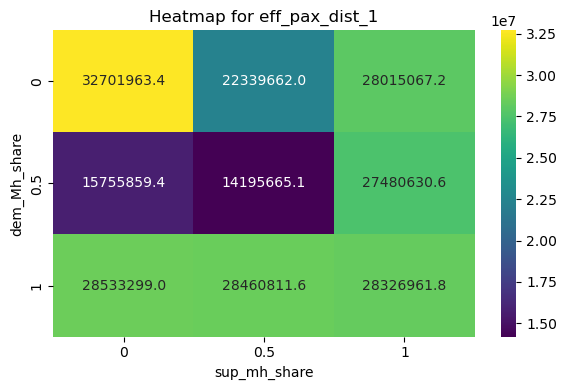

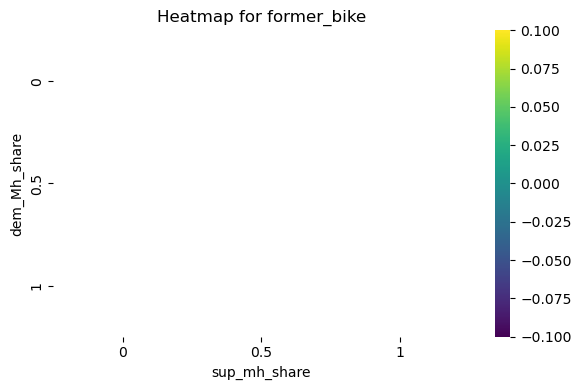

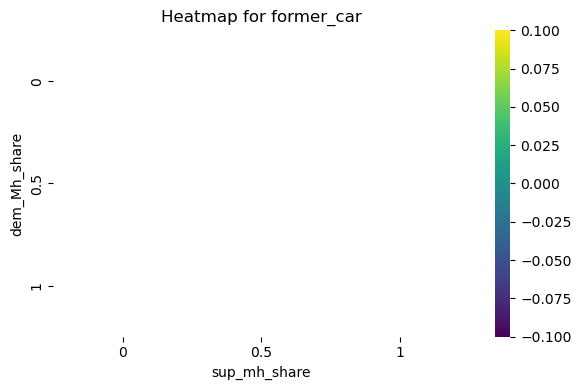

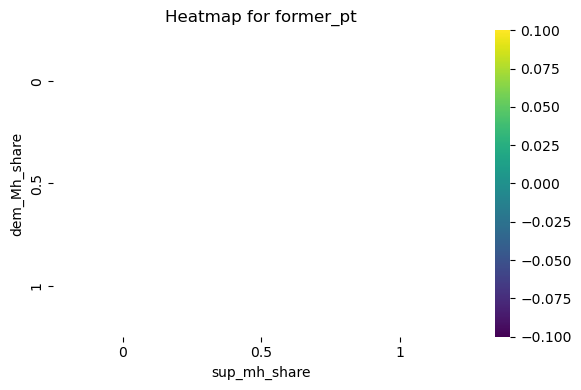

In [35]:
for col in filtered_columns_dem:
    pivot_df = df_dem.pivot(index='dem_mh_share', columns='sup_mh_share', values=col)
    plt.figure(figsize=(6, 4))
    sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt='.1f')
    plt.title(f'Heatmap for {col}')
    plt.xlabel('sup_mh_share')
    plt.ylabel('dem_Mh_share')
    plt.tight_layout()
    plt.show()

In [36]:
aggr_dem.xs(('0','1','ss')).keys()

Index(['informed', 'requests_0', 'requests_1', 'gets_offer_0', 'gets_offer_1',
       'accepts_offer_0', 'accepts_offer_1', 'registered_0', 'registered_1',
       'car', 'pt', 'bike', 'time_occ_1', 'days_since_reg', 'xp_wait_0',
       'xp_wait_1', 'corr_xp_wait_0', 'corr_xp_wait_1', 'xp_ivt_0', 'xp_ivt_1',
       'xp_km_fare_0', 'xp_km_fare_1', 'expected_wait_0', 'expected_wait_1',
       'expected_ivt_0', 'expected_ivt_1', 'expected_km_fare_0',
       'expected_km_fare_1', 'informed_mh', 'informed_sh', 'registered_mh',
       'registered_sh_0', 'registered_sh_1', 'requests_mh', 'requests_sh_0',
       'requests_sh_1', 'requests_sh_largest', 'gets_offer_mh_0',
       'gets_offer_mh_1', 'gets_offer_mh_largest', 'gets_offer_sh_0',
       'gets_offer_sh_1', 'accepts_offer_mh_0', 'accepts_offer_mh_1',
       'accepts_offer_mh_largest', 'exp_wait_mh', 'exp_wait_sh_0',
       'exp_wait_sh_1', 'exp_wait_sh_largest', 'exp_wait_sh_smallest',
       'exp_corr_wait_mh', 'exp_corr_wait_sh_0', 'ex